In [391]:
import uproot as ur
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import pygama.math.histogram as pgh
import legend_utils as lu
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import FormatStrFormatter
plt.style.use('/global/cfs/cdirs/legend/software/KrSTC/data/physrev.mpl')


In [50]:
def gauss(x, A, mu, sigma):
        return A* np.exp(-(x-mu)**2 / (2*sigma**2))
def quad_bkg(x, p0, p1, p2):
    return p0 + p1*x + p2*x**2
def gauss_with_quad_bkg(x,  A, mu, sigma, p0, p1, p2):  # bkg = p0 + p1*x + p2*x**2
    return gauss(x, A, mu, sigma) + quad_bkg(x, p0, p1, p2)

def fwhm_func(E_cal, a, b, c):
     return np.sqrt(a**2 + b**2*E_cal**2 + c**4*E_cal**4)



In [51]:
evt_filenames_list = '/global/cfs/cdirs/m2676/users/nfuad/LEGEND/SIMS/evt_filenames_2.txt'
multiplicity = 1
df = pd.DataFrame()
primaries = 0
with open(evt_filenames_list) as f:
    evt_filenames = f.read().splitlines()
    for evt_filename in evt_filenames:
        ff = ur.open(evt_filename)
        dets = ff['simTree/mage_id'].array(library='np')
        primaries += len(dets)
        energies = ff['simTree/energy'].array(library='np')
        d = pd.DataFrame({'mage_id': dets, 'energy': energies})
        mul_1 = d['mage_id'].apply(lambda x: len(x)==1)
        d = d[mul_1]
        d['mage_id'] = d['mage_id'].apply(lambda x: x[0])
        d['energy'] = d['energy'].apply(lambda x: x[0])
        df = pd.concat([df, d], ignore_index=True)
    
print(primaries)
df['energy'] = df['energy'].apply(lambda x: x*1000)
df


120994397


,mage_id,energy
0,1010906,401.827494
1,1010704,57.359934
2,1010804,25.592759
3,1010906,47.996853
4,1010805,377.575578
...,...,...
50165091,1010502,1442.659079
50165092,1011105,739.100306
50165093,1010910,53.969656
50165094,1010703,3.997480


In [334]:
evt_filenames_list = '/global/cfs/cdirs/m2676/users/nfuad/LEGEND/SIMS/evt_filenames_2.txt'
multiplicity = 1
df = pd.DataFrame()
primaries = 0
with open(evt_filenames_list) as f:
    evt_filenames = f.read().splitlines()
    for evt_filename in evt_filenames:
        ff = ur.open(evt_filename)
        dets = ff['simTree/mage_id'].array(library='np')
        dets = np.concatenate(dets)
        primaries += len(dets)
        energies = ff['simTree/energy'].array(library='np')
        energies = np.concatenate(energies)
        d = pd.DataFrame({'mage_id': dets, 'energy': energies})
        # d2 = d.copy()
        # mul = d['mage_id'].apply(lambda x: len(x)==2)
        # d = d[mul]
        #d['mage_id'] = d['mage_id'].apply(lambda x: x[0])
        # d['energy'] = d['energy'].apply(lambda x: x[0])

        
        # d2['mage_id'] = d2['mage_id'].apply(lambda x: x[1])
        # d2['energy'] = d2['energy'].apply(lambda x: x[1])
        # d = pd.concat([d, d2], ignore_index=True)
        df = pd.concat([df, d], ignore_index=True)
        

    
print(primaries)
df['energy'] = df['energy'].apply(lambda x: x*1000)
df

155223696


,mage_id,energy
0,1010704,144.095972
1,1011102,700.127400
2,1010906,401.827494
3,1010805,434.088314
4,1010806,603.299438
...,...,...
155223691,1011004,162.523602
155223692,1010705,305.416521
155223693,1011102,183.354690
155223694,1010703,3.997480


In [436]:
dep_peaks = [
    {
        'name': '1576',
        'energy': 1576.75,
        'intensity': 16.67,
        'range': [1572,1582],
        'curve_fit_guess': [200, 1576.5, 2, 0, 0, 0],
        'sidebands': [[1572,1573],[1580,1582]],
        'sideband_peak_range': [1573, 1580]
    },
    {
        'name':'1635',
        'energy': 1634.4,
        'intensity': 0.019,
        'range': [1630,1640],
        'curve_fit_guess': [150, 1634.5, 1, 0, 0, 0],
        'curve_fit_guess_mu_fixed': [150, 1, 0, 0, 0],
        'sidebands': [[1630,1632],[1638,1640]],
        'sideband_peak_range': [1632, 1638]
    },
    {
        'name': '1987',
        'energy': 1987.6,
        'intensity': 1.09,
        'range': [1975,2000],
        'curve_fit_guess': [1000, 1988, 1, 0, 0, 0],
        'cuve_fit_guess_mu_fixed': [1000, 1, 0, 0, 0],
        'sidebands': [[1980,1982],[1992,1995]],
        'sideband_peak_range': [1982, 1992]
    },
    {
        'name': '2180',
        'energy': 2180.25,
        'intensity': 3.19,
        'range': [2174,2187],
        'curve_fit_guess': [400, 2180, 1, 0, 0, 0],
        'sidebands': [[2174,2176],[2185,2187]],
        'sideband_peak_range': [2176, 2185]
    },
    {
        'name': '2231',
        'energy': 2231.5,
        'intensity': 7.92,
        'range': [2220,2240],
        'curve_fit_guess': [300, 2231, 1, 0, 0, 0],
        'sidebands': [[2220,2226],[2238,2240]],
        'sideband_peak_range': [2226, 2238]
    },
    {
        'name': '2251',
        'energy': 2251,
        'intensity': 1.86,
        'range': [2245,2257],
        'curve_fit_guess': [300, 2252, 2, 0, 0, 0],
        'sidebands': [[2245,2247],[2254,2256]],
        'sideband_peak_range': [2247, 2254]
    },
    {
        'name': '2429',
        'energy': 2429.5,
        'intensity': 0.95,
        'range': [2422,2438],
        'curve_fit_guess': [700, 2429, 1, 0, 0, 0],
        'cuve_fit_guess_mu_fixed': [700, 1, 0, 0, 0],
        'sidebands': [[2422,2425],[2435,2438]],
        'sideband_peak_range': [2426, 2433]
    }
]

# peaks_in full spectrum
all_peaks = [
    {
        'name':'846',
        'energy': 846.8,
        'intensity': 100,
        'range': [835, 855],
        'curve_fit_guess': [1000, 846.8, 1, 0, 0, 0],
        'sidebands': [[835, 840],[852, 855]],
        'sideband_peak_range': [843, 850.5]
    },
    {
        'name': '1037',
        'energy': 1037,
        'intensity': 14.3,
        'range': [1025, 1045],
        'curve_fit_guess': [1000, 1037, 1, 0, 0, 0],
        'sidebands': [[1025, 1030],[1043, 1045]],
        'sideband_peak_range': [1034, 1042]
    },
    {
        'name': '1238',
        'energy': 1238,
        'intensity': 66.5,
        'range': [1228, 1248],
        'curve_fit_guess': [1000, 1238, 1, 0, 0, 0],
        'sidebands': [[1228, 1232],[1244, 1247]],
        'sideband_peak_range': [1234, 1242.5]
    },
    {
        'name': '1771',
        'energy': 1771,
        'intensity': 15.4,
        'range': [1760, 1780],
        'curve_fit_guess': [1000, 1771, 1, 0, 0, 0],
        'sidebands': [[1760, 1765],[1777, 1780]],
        'sideband_peak_range': [1766.5, 1776]
    },
    {
        'name': '2015',
        'energy': 2015,
        'intensity': 3.015,
        'range': [2005, 2025],
        'curve_fit_guess': [1000, 2015, 1, 0, 0, 0],
        'sidebands': [[2005, 2008],[2022, 2025]],
        'sideband_peak_range': [2010, 2020]
    },
    {
        'name': '2034',
        'energy': 2034,
        'intensity': 7.77,
        'range': [2025, 2045],
        'curve_fit_guess': [1000, 2034, 1, 0, 0, 0],
        'sidebands': [[2025, 2028],[2041, 2045]],
        'sideband_peak_range': [2030, 2040]
    },
    {
        'name': '2113',
        'energy': 2113,
        'intensity': 0.377,
        'range': [2106, 2120],
        'curve_fit_guess': [1000, 2113, 1, 0, 0, 0],
        'sidebands': [[2106, 2108],[2119, 2120]],
        'sideband_peak_range': [2108.5, 2118]
    },
    {
        'name': '2598',
        'energy': 2598,
        'intensity': 16.67,
        'range': [2588, 2608],
        'curve_fit_guess': [1000, 2598, 1, 0, 0, 0],
        'sidebands': [[2588, 2592],[2605, 2607]],
        'sideband_peak_range': [2593, 2604]
    },
    {
        'name': '2657',
        'energy': 2657,
        'intensity': 0.019,
        'range': [2650, 2665],
        'curve_fit_guess': [1000, 2657, 1, 0, 0, 0],
        'sidebands': [[2650, 2654],[2661, 2665]],
        'sideband_peak_range': [2655.5, 2660.5]
    },
    {
        'name': '3009',
        'energy': 3009,
        'intensity': 1.04,
        'range': [3000, 3020],
        'curve_fit_guess': [1000, 3009, 1, 0, 0, 0],
        'sidebands': [[3000, 3002],[3017, 3020]],
        'sideband_peak_range': [3004, 3015.5]
    },
    {
        'name': '3202',
        'energy': 3202,
        'intensity': 3.21,
        'range': [3190, 3210],
        'curve_fit_guess': [1000, 3202, 1, 0, 0, 0],
        'sidebands': [[3190, 3193],[3209, 3210]],
        'sideband_peak_range': [3196, 3208]
    },
    {
        'name': '3253',
        'energy': 3253,
        'intensity': 7.92,
        'range': [3240, 3261],
        'curve_fit_guess': [1000, 3253, 1, 0, 0, 0],
        'sidebands': [[3240, 3243],[3260, 3261]],
        'sideband_peak_range': [3247.5, 3260]
    },
    {
        'name': '3273',
        'energy': 3273,
        'intensity': 1.88,
        'range': [3260, 3282],
        'curve_fit_guess': [1000, 3273, 1, 0, 0, 0],
        'sidebands': [[3260, 3265],[3280, 3282]],
        'sideband_peak_range': [3264, 3276]
    },
    {
        'name': '3451',
        'energy': 3451,
        'intensity': 0.95,
        'range': [3440, 3460],
        'curve_fit_guess': [1000, 3451, 1, 0, 0, 0],
        'sidebands': [[3457.5, 3460],[3257.5, 3460]],
        'sideband_peak_range': [3448.5, 3454.5]
    }
]

In [335]:
count_map = lu.get_count_map(df)
count_map_percentage = count_map/count_map.sum().sum()*100
count_map_percentage = count_map_percentage.round(1)
count_map_percentage_with_det_type = lu.attach_det_type_map(count_map_percentage)
count_map_percentage_with_det_type = count_map_percentage_with_det_type.apply(lambda x: x+'%')
# strip % if starts with '.'
for col in count_map_percentage_with_det_type:
    for i in range(1, len(count_map_percentage_with_det_type[col])+1):
        val = count_map_percentage_with_det_type[col][i]
        if val[0] == '.':
            count_map_percentage_with_det_type[col][i] = '.'
count_map_percentage_with_det_type

,string 1,string 2,string 3,string 4,string 5,string 7,string 8,string 9,string 10,string 11
1,V:0.1%,B:0.0%,B:0.0%,B:0.0%,V:0.1%,V:0.2%,B:0.1%,B:0.1%,B:0.1%,B:0.0%
2,V:0.2%,C:0.1%,B:0.0%,B:0.1%,V:0.5%,V:0.8%,B:0.1%,B:0.1%,B:0.1%,B:0.1%
3,V:0.3%,C:0.2%,P:0.1%,B:0.1%,V:1.9%,V:5.0%,C:0.8%,B:0.1%,B:0.1%,B:0.1%
4,V:0.4%,C:0.4%,P:0.1%,B:0.1%,V:2.5%,V:30.0%,V:3.0%,B:0.3%,B:0.2%,P:0.2%
5,V:0.4%,C:0.5%,P:0.2%,B:0.2%,V:2.3%,V:7.6%,V:9.3%,P:0.8%,B:0.3%,P:0.3%
6,V:0.2%,C:0.4%,P:0.3%,B:0.3%,.,V:1.2%,V:8.4%,P:1.5%,B:0.5%,P:0.4%
7,V:0.2%,V:0.2%,P:0.3%,B:0.3%,.,V:0.2%,V:1.7%,P:2.2%,B:0.6%,P:0.4%
8,V:0.1%,V:0.1%,P:0.2%,V:0.5%,.,.,V:0.5%,P:1.6%,B:0.6%,P:0.3%
9,V:0.0%,V:0.0%,P:0.1%,V:0.5%,.,.,V:0.2%,P:0.8%,V:1.4%,P:0.2%
10,.,.,.,V:0.3%,.,.,V:0.1%,P:0.4%,V:0.8%,P:0.1%


In [337]:
count_map_K = count_map/1000000
count_map_K = count_map_K.round(1)
count_map_K_with_det_type = lu.attach_det_type_map(count_map_K)
count_map_K_with_det_type

,string 1,string 2,string 3,string 4,string 5,string 7,string 8,string 9,string 10,string 11
1,V:0.1,B:0.0,B:0.1,B:0.1,V:0.2,V:0.3,B:0.1,B:0.1,B:0.1,B:0.1
2,V:0.2,C:0.2,B:0.1,B:0.1,V:0.8,V:1.3,B:0.1,B:0.1,B:0.1,B:0.1
3,V:0.5,C:0.3,P:0.1,B:0.1,V:2.9,V:7.8,C:1.3,B:0.2,B:0.2,B:0.1
4,V:0.6,C:0.6,P:0.2,B:0.2,V:3.9,V:46.5,V:4.6,B:0.4,B:0.3,P:0.3
5,V:0.6,C:0.7,P:0.4,B:0.3,V:3.6,V:11.8,V:14.4,P:1.2,B:0.5,P:0.5
6,V:0.4,C:0.5,P:0.4,B:0.4,.,V:1.9,V:13.1,P:2.4,B:0.8,P:0.6
7,V:0.3,V:0.3,P:0.4,B:0.5,.,V:0.4,V:2.7,P:3.5,B:1.0,P:0.6
8,V:0.1,V:0.1,P:0.3,V:0.8,.,.,V:0.8,P:2.5,B:0.9,P:0.4
9,V:0.1,V:0.1,P:0.2,V:0.7,.,.,V:0.3,P:1.3,V:2.2,P:0.3
10,.,.,.,V:0.4,.,.,V:0.1,P:0.6,V:1.3,P:0.2


In [257]:
mass_map = lu.get_mass_map()
counts_per_g_map = count_map/mass_map
# counts_per_g_map = counts_per_g_map.round(1)
for col in counts_per_g_map:
    for i in range(1, len(counts_per_g_map[col])+1):
        val = counts_per_g_map[col][i]
        if str(val) == 'nan':
            counts_per_g_map[col][i] = '.'
        else:
            counts_per_g_map[col][i] = round(val,1)
counts_per_g_map

/tmp/ipykernel_576045/1457894982.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  counts_per_g_map[col][i] = round(val,1)
/tmp/ipykernel_576045/1457894982.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  counts_per_g_map[col][i] = '.'


,string 1,string 2,string 3,string 4,string 5,string 7,string 8,string 9,string 10,string 11
1,24.3,20.1,20.2,22.3,32.4,38.0,43.9,37.7,28.8,29.0
2,43.5,23.9,29.9,31.2,65.8,120.7,61.5,50.5,39.5,40.6
3,64.2,41.4,48.2,46.8,203.8,678.0,136.4,77.3,61.6,62.0
4,88.5,71.1,75.6,72.3,418.3,6467.8,649.4,137.3,102.8,81.8
5,87.0,75.8,98.4,95.1,413.4,1463.0,2237.0,263.1,140.6,120.4
6,64.7,56.8,129.2,132.7,.,183.9,1984.5,548.8,220.4,172.3
7,35.3,35.6,133.1,171.1,.,62.0,430.0,818.6,306.7,199.1
8,18.9,19.0,110.4,152.2,.,.,112.5,672.9,350.5,181.6
9,10.3,9.9,83.1,150.7,.,.,33.9,412.3,304.1,129.7
10,.,.,.,87.2,.,.,13.6,184.9,160.8,90.7


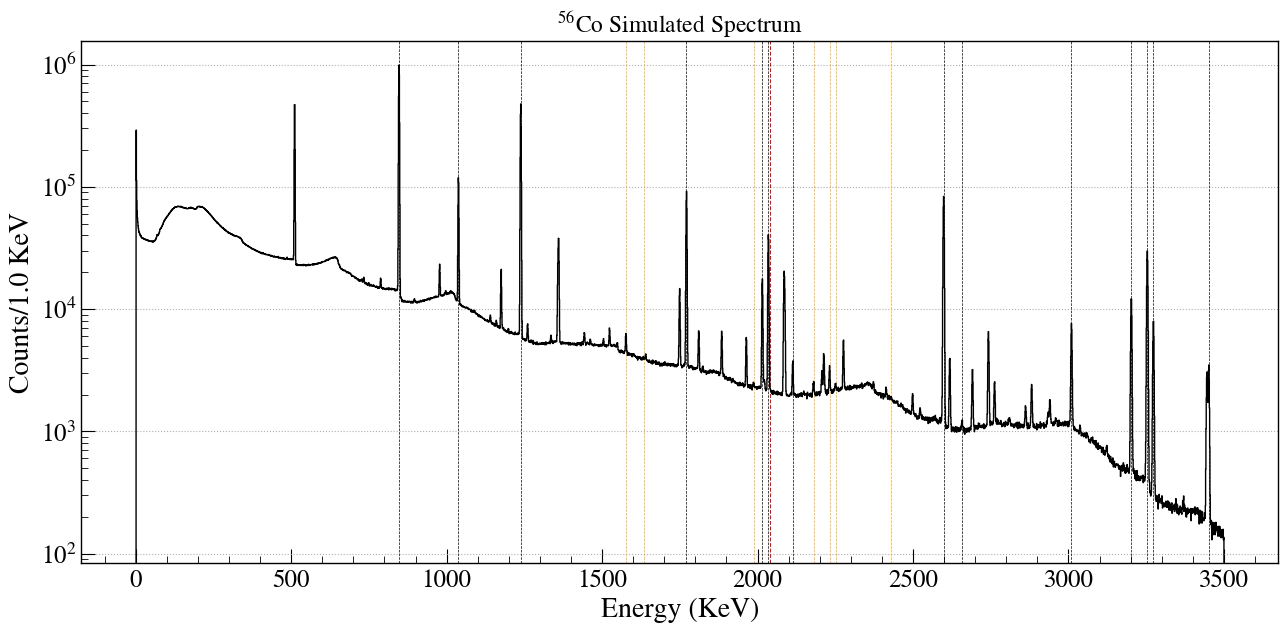

In [339]:
dets = [1010704]
E_dets = df[df['mage_id'].isin(dets)]['energy']

fig = plt.figure(figsize=(14,6))
ax = plt.gca()
# draw a dashed line on energies of each all_peaks
for peak in all_peaks:
    ax.axvline(peak['energy'], color='k', ls='--', lw=0.5)
# draw a dashed line on energies of each dep peak
for dep_peak in dep_peaks:
    ax.axvline(dep_peak['energy'], color='orange', ls='--', lw=0.5)
ax.axvline(2039, color='red', ls='--', lw=0.75)
hist, bins, vars = pgh.get_hist(E_dets, range=[0, 3500], dx=1)
binsize = bins[1]-bins[0]
pgh.plot_hist(hist, bins, color='k', lw=1)
ax.set_yscale('log')
ax.set_xlabel('Energy (KeV)')
ax.set_ylabel('Counts/'+str(round(binsize,2))+' KeV')
ax.set_title(r'$^{56}$Co Simulated Spectrum')
# turn x axis grid off
ax.xaxis.grid(False)

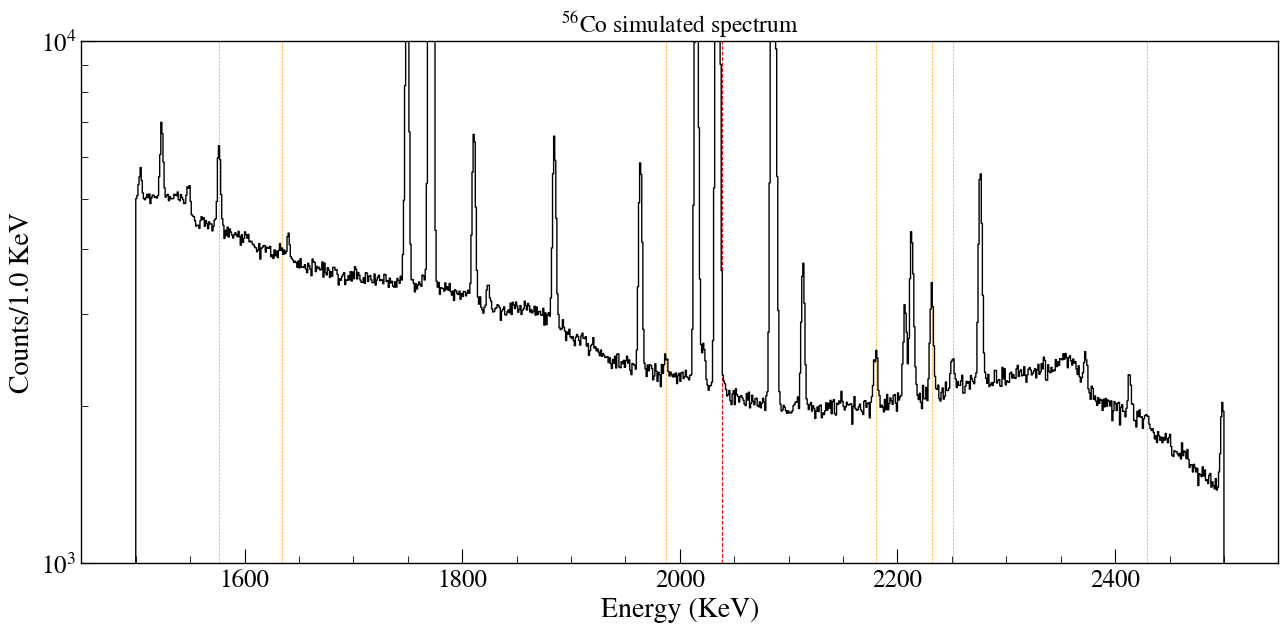

In [342]:
# dets = [1010704]
E_dets = df[df['mage_id'].isin(dets)]['energy']

fig = plt.figure(figsize=(14,6))
ax = plt.gca()
# draw a dashed line on energies of each dep peak
ax.axvline(2039, color='red', ls='--', lw=0.75)
for dep_peak in dep_peaks:
    ax.axvline(dep_peak['energy'], color='orange', ls='--', lw=0.5)
hist, bins, vars = pgh.get_hist(E_dets, range=[1500, 2500], dx=1)
binsize = bins[1]-bins[0]
pgh.plot_hist(hist, bins, color='k', lw=1)
ax.set_ylim(1000, 10000)
ax.set_yscale('log')
ax.set_xlabel('Energy (KeV)')
ax.set_ylabel('Counts/'+str(round(binsize,2))+' KeV')
ax.set_title(r'$^{56}$Co simulated spectrum')
ax.xaxis.grid(False)

[1572, 1582]
peak width: 7
peak_count: 37408
peak_count: 37408 sideband_count: 13187 sidband_width: 3
tau: 2.3333333333333335
[1630, 1640]
peak width: 6
peak_count: 23906
peak_count: 23906 sideband_count: 16016 sidband_width: 4
tau: 1.5
[1975, 2000]
peak width: 10
peak_count: 23682
peak_count: 23682 sideband_count: 11502 sidband_width: 5
tau: 2.0
[2174, 2187]
peak width: 9
peak_count: 20438
peak_count: 20438 sideband_count: 7939 sidband_width: 4
tau: 2.25
using fixed mu
A 186.61800240883937
[2220, 2240]
peak width: 12
peak_count: 30158
peak_count: 30158 sideband_count: 16577 sidband_width: 8
tau: 1.5
[2245, 2257]
peak width: 7
peak_count: 16400
peak_count: 16400 sideband_count: 8692 sidband_width: 4
tau: 1.75
using fixed mu
A 87.73664410647648
[2422, 2438]
peak width: 7
peak_count: 13230
peak_count: 13230 sideband_count: 11056 sidband_width: 6
tau: 1.1666666666666667
using fixed mu
A 50.137633733447636


,Peak,Intensity,N_sideband,B_sideband,tau,S_sideband,S_curve_fit,S_curve_fit_err,FWHM,FWHM_err
0,1576,16.670,37408,13187,2.333333,6638.333333,5900.129996,651.074931,3.008611,0.231161
1,1635,0.019,23906,16016,1.500000,-118.000000,NaN,NaN,NaN,NaN
2,1987,1.090,23682,11502,2.000000,678.000000,879.141251,336.549492,4.376743,1.319451
3,2180,3.190,20438,7939,2.250000,2575.250000,2651.221170,851.096209,4.337872,0.886221
4,2231,7.920,30158,16577,1.500000,5292.500000,4530.181890,303.381066,3.272714,0.172311
5,2251,1.860,16400,8692,1.750000,1189.000000,984.257528,434.289047,3.161913,1.030375
6,2429,0.950,13230,11056,1.166667,331.333333,585.338719,404.289051,4.387371,2.210133


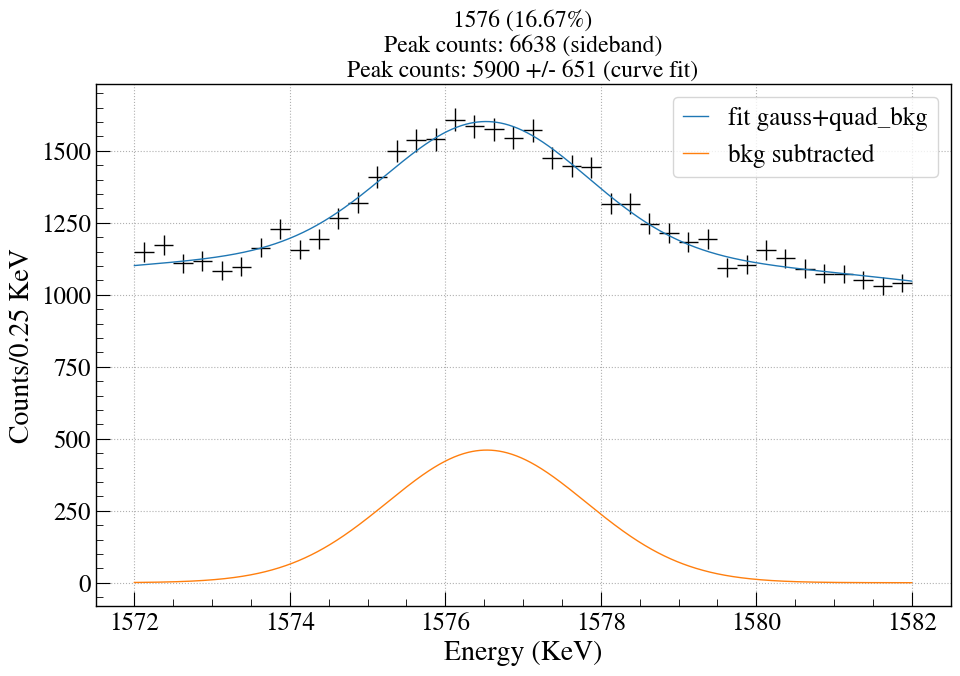

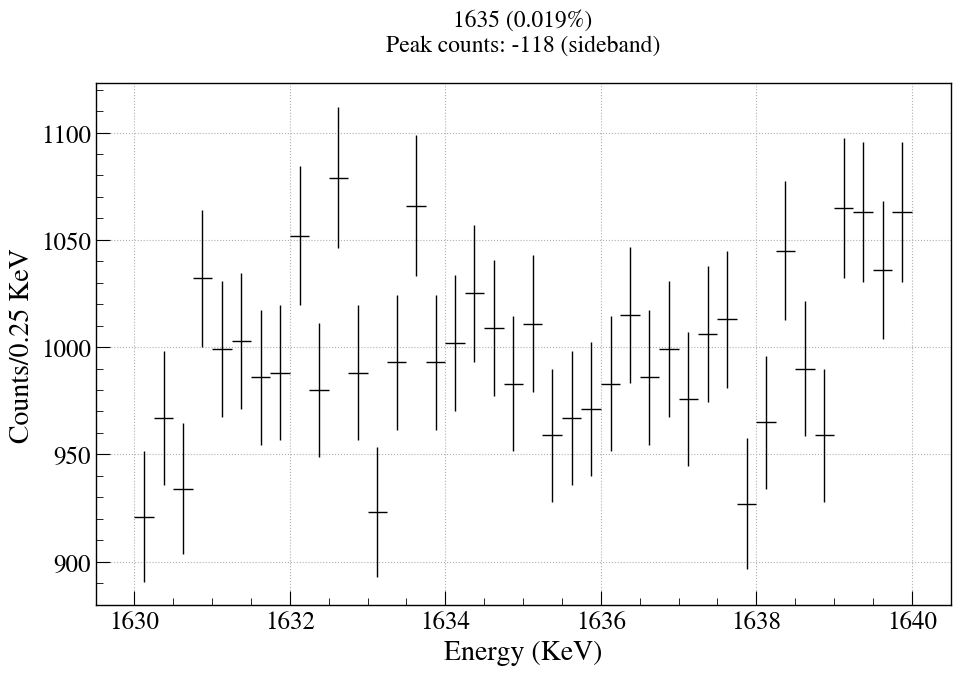

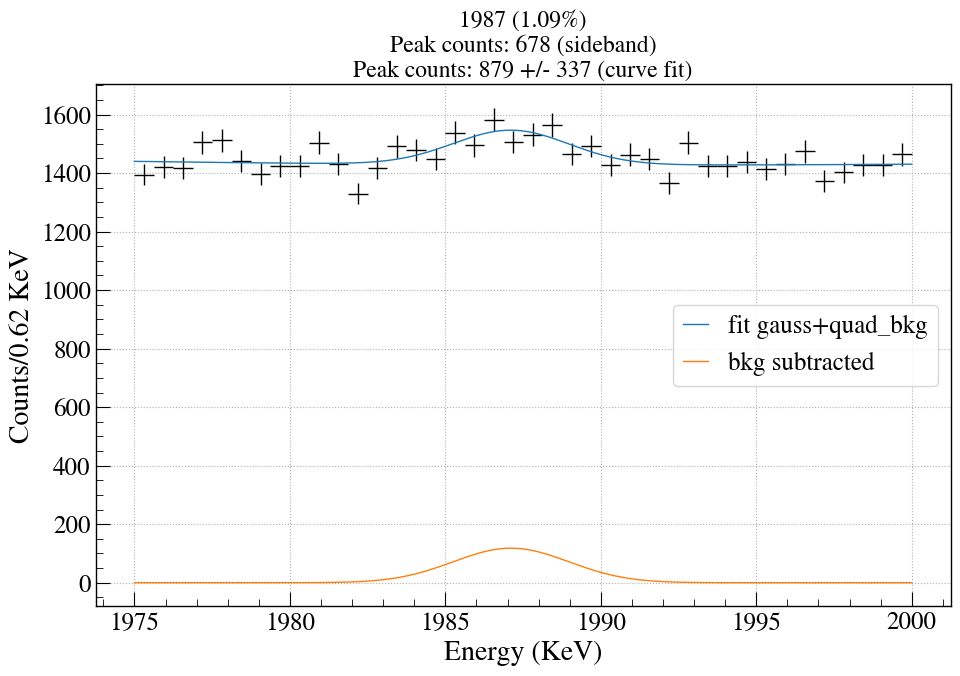

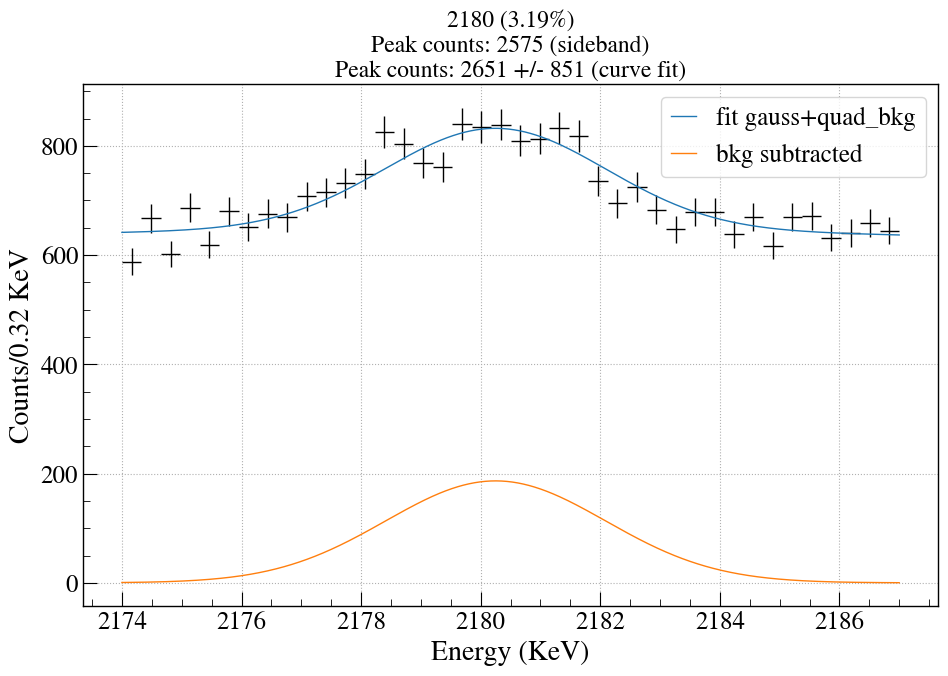

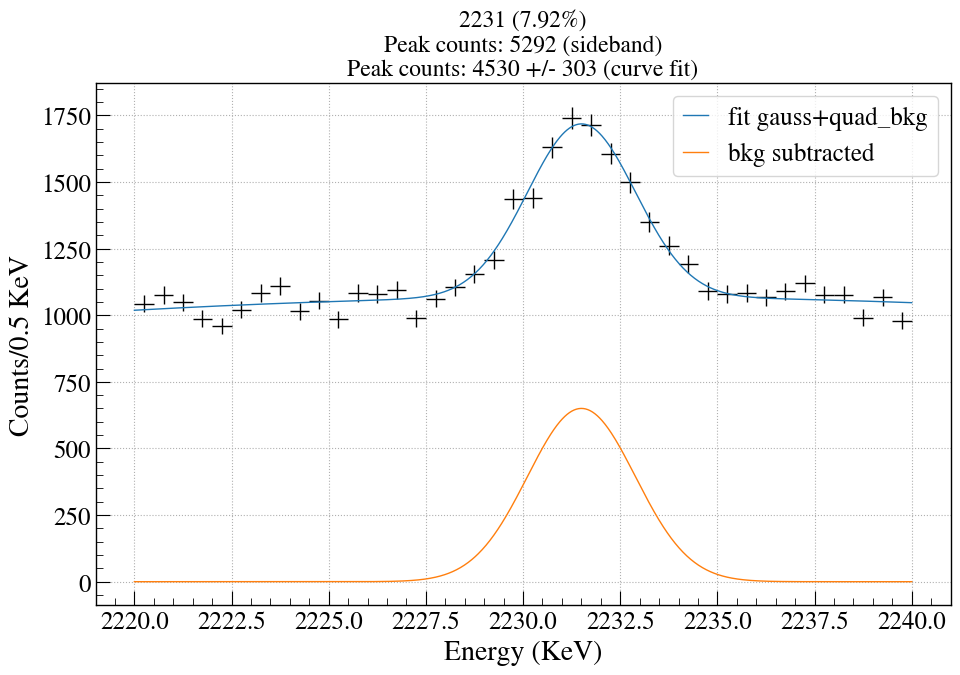

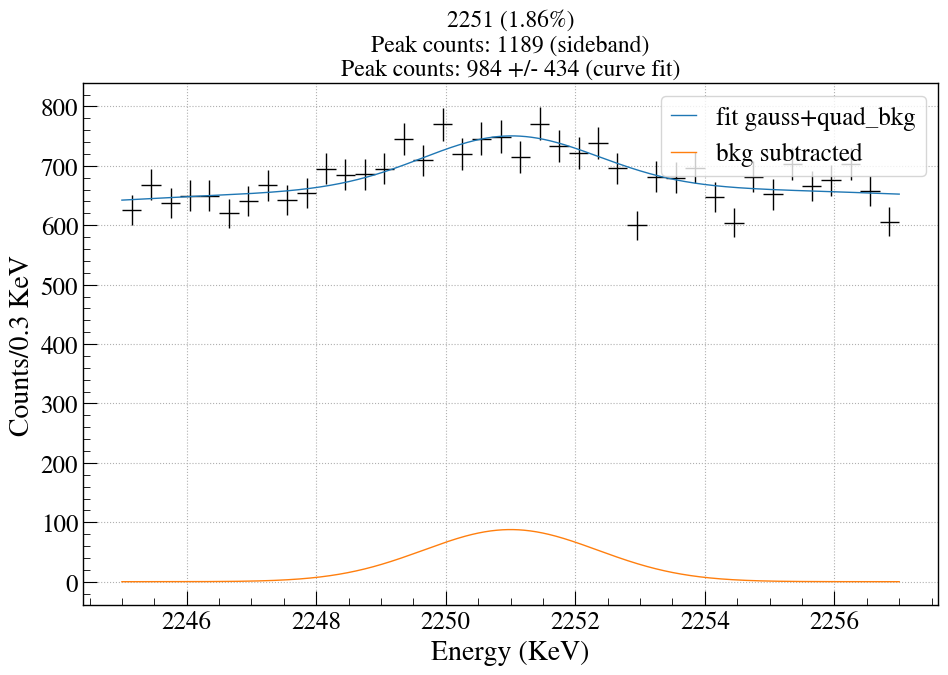

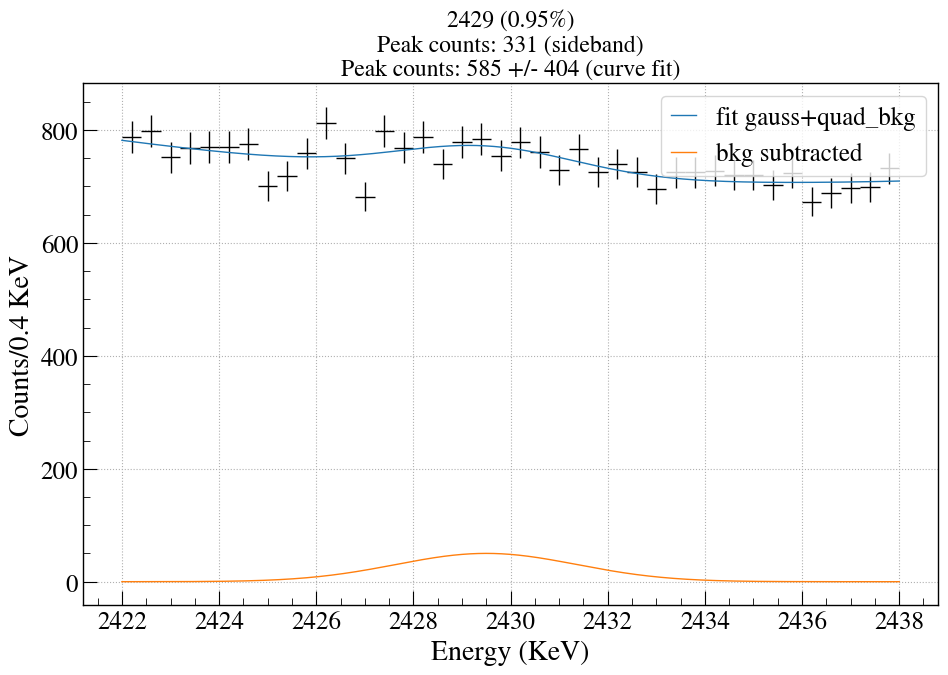

In [416]:
df_peak_counts = pd.DataFrame()
for i in range(len(dep_peaks)):
    peaks_to_consider = [0,1,2,3,4,5,6]
    # peaks_to_consider = [6]
    if i not in peaks_to_consider:
        continue
    peak = dep_peaks[i]
    E_dets = df[df['mage_id'].isin(dets)]['energy']
    print(peak['range'])
    E_peak = E_dets[(E_dets>peak['range'][0]) & (E_dets<peak['range'][1])]
    n_bins = 40
    h,b,v = pgh.get_hist(E_peak, range=peak['range'], dx=(peak['range'][1]-peak['range'][0])/n_bins)
    binsize = b[1]-b[0]
    
    fig = plt.figure(figsize=(10,6))
    ax = plt.gca()

    pgh.plot_hist(h, b,v, color='k', lw=1)
    ax.set_xlabel('Energy (KeV)')
    ax.set_ylabel('Counts/'+str(round(binsize,2))+' KeV')

    # sideband
    peak_width = peak['sideband_peak_range'][1]-peak['sideband_peak_range'][0]
    print('peak width:', peak_width)
    peak_count = len(E_peak[(E_peak>peak['sideband_peak_range'][0]) & (E_peak<peak['sideband_peak_range'][1])])
    print('peak_count:', peak_count)
    sideband_width = 0
    sideband_count = 0
    for sideband in peak['sidebands']:
        sideband_width += sideband[1]-sideband[0]
        sideband_count += len(E_peak[(E_dets>sideband[0]) & (E_peak<sideband[1])])
    print('peak_count:', peak_count, 'sideband_count:', sideband_count, 'sidband_width:', sideband_width)
    tau = peak_width/sideband_width
    print('tau:', tau)
    S = peak_count - tau*sideband_count
    # peak_count = round(peak_count)
    # sideband_count = round(sideband_count)
    # S = round(S)
    d = pd.DataFrame({'Peak':peak['name'],'Intensity':peak['intensity'], 'N_sideband': [round(peak_count)], 'B_sideband': [sideband_count],'tau': [tau], 'S_sideband': [S]})
    title_str_sideband = 'Peak counts: '+str(round(S))+' (sideband)'
    ax.set_title(peak['name']+' ('+str(peak['intensity'])+'%)\n'+title_str_sideband+'\n')
    if i in [1]:
        d['S_curve_fit'] = np.nan
        d['S_curve_fit_err'] = np.nan
        d['FWHM']= np.nan
        d['FWHM_err']= np.nan

    # curve fit
    try:
        peaks_with_mu_fixed = [ 3,5, 6]
        if i in peaks_with_mu_fixed:
            print('using fixed mu')
            mu = peak['energy']
            def gauss_with_mu_fixed(x, A, sigma):
                return A* np.exp(-(x-mu)**2 / (2*sigma**2))
            def gauss_with_quad_bkg_with_mu_fixed(x,  A, sigma, p0, p1, p2): 
                # bkg = p0 + p1*x + p2*x**2
                return gauss(x, A, mu, sigma) + quad_bkg(x, p0, p1, p2)
            b_mids = (b[1:]+b[:-1])/2
        
            guess = [peak['curve_fit_guess'][0], peak['curve_fit_guess'][2], peak['curve_fit_guess'][3], peak['curve_fit_guess'][4], peak['curve_fit_guess'][5]]
            popt, pcov = curve_fit(gauss_with_quad_bkg_with_mu_fixed, b_mids, h, p0=guess)
            perr = np.sqrt(np.diag(pcov))

            x = np.linspace(peak['range'][0], peak['range'][1], 1000)
            print('A', popt[0])
            
            
            total_fit_y = gauss_with_quad_bkg(x, popt[0], mu, popt[1], popt[2], popt[3], popt[4])
            ax.plot(x, total_fit_y, lw=1, label='fit gauss+quad_bkg')

            bkg = quad_bkg(x, *popt[2:])
            # bkg = quad_bkg(x, popt_fixed_mu[2:])
            bkg_subtracted_y = total_fit_y - bkg
            ax.plot(x, bkg_subtracted_y, lw=1, label='bkg subtracted')
            ax.legend()
            A = popt[0]
            sigma = popt[1]
            A_err = perr[0]
            sigma_err = perr[1]
            area = A*sigma*np.sqrt(2*np.pi)/binsize
            area = abs(area)
            area_err = area*np.sqrt((A_err/A)**2 + (sigma_err/sigma)**2)
            area_err = abs(area_err)
            title_str_curve_fit = 'Peak counts: '+str(round(area))+' +/- '+str(round(area_err))+' (curve fit)'
            d['S_curve_fit'] = abs(area)
            d['S_curve_fit_err'] = abs(area_err)
            d['FWHM']= abs(sigma*2.355)
            d['FWHM_err']= abs(sigma_err*2.355)
            ax.set_title(peak['name']+' ('+str(peak['intensity'])+'%)\n'+title_str_sideband+'\n'+title_str_curve_fit)

        elif i in [0,2, 4]:
        
            b_mids = (b[1:]+b[:-1])/2
            popt, pcov = curve_fit(gauss_with_quad_bkg, b_mids, h, p0=peak['curve_fit_guess'])
            perr = np.sqrt(np.diag(pcov))
            # popt_fixed_mu, pcov_fixed_mu = curve_fit(gauss_with_quad_bkg_with_mu_fixed, b_mids, h, p0=peak['curve_fit_guess_mu_fixed'])
            # perr_fixed_mu = np.sqrt(np.diag(pcov_fixed_mu))
            # print(popt_fixed_mu, perr_fixed_mu)
            x = np.linspace(peak['range'][0], peak['range'][1], 1000)
            total_fit_y = gauss_with_quad_bkg(x, *popt)
            ax.plot(x, total_fit_y, lw=1, label='fit gauss+quad_bkg')

            bkg = quad_bkg(x, *popt[3:])
            # bkg = quad_bkg(x, popt_fixed_mu[2:])
            bkg_subtracted_y = total_fit_y - bkg
            ax.plot(x, bkg_subtracted_y, lw=1, label='bkg subtracted')
            ax.legend()
            A = popt[0]
            sigma = popt[2]
            A_err = perr[0]
            sigma_err = perr[2]
            area = A*sigma*np.sqrt(2*np.pi)/binsize
            area = abs(area)
            area_err = area*np.sqrt((A_err/A)**2 + (sigma_err/sigma)**2)
            area_err = abs(area_err)
            title_str_curve_fit = 'Peak counts: '+str(round(area))+' +/- '+str(round(area_err))+' (curve fit)'
            d['S_curve_fit'] = abs(area)
            d['S_curve_fit_err'] = abs(area_err)
            d['FWHM']= abs(sigma*2.355)
            d['FWHM_err']= abs(perr[2]*2.355)
            ax.set_title(peak['name']+' ('+str(peak['intensity'])+'%)\n'+title_str_sideband+'\n'+title_str_curve_fit)
    except:
        title_str_curve_fit = ''
        d['S_curve_fit'] = np.nan
        d['S_curve_fit_err'] = np.nan
        d['FWHM']= np.nan
        d['FWHM_err']= np.nan
        print(peak['name'],'fit failed')

    df_peak_counts = pd.concat([df_peak_counts, d], ignore_index=True)
    
    # ax.set_title(peak['name']+' ('+str(peak['intensity'])+'%)\n'+title_str_sideband+'\n'+title_str_curve_fit)
    
df_peak_counts

In [381]:
df_to_print = df_peak_counts.copy()
df_to_print['tau'] = df_to_print['tau'].round(2)
df_to_print['S_sideband'] = df_to_print['S_sideband'].round()
df_to_print['S_curve_fit'] = df_to_print['S_curve_fit'].round()
df_to_print['S_curve_fit_err'] = df_to_print['S_curve_fit_err'].round()
df_to_print['FWHM'] = df_to_print['FWHM'].round(2)
df_to_print['FWHM_err'] = df_to_print['FWHM_err'].round(2)
df_to_print

,Peak,Intensity,N_sideband,B_sideband,tau,S_sideband,S_curve_fit,S_curve_fit_err,FWHM,FWHM_err
0,1576,16.670,37408,13187,2.33,6638.0,5900.0,651.0,3.01,0.23
1,1635,0.019,23906,16016,1.50,-118.0,NaN,NaN,NaN,NaN
2,1987,1.090,23682,11502,2.00,678.0,879.0,337.0,4.38,1.32
3,2180,3.190,20438,7939,2.25,2575.0,2651.0,851.0,4.34,0.89
4,2231,7.920,30158,16577,1.50,5292.0,4530.0,303.0,3.27,0.17
5,2251,1.860,16400,8692,1.75,1189.0,984.0,434.0,3.16,1.03
6,2429,0.950,13230,11056,1.17,331.0,585.0,404.0,4.39,2.21


1576 37408 13187 2.3333333333333335
1987 23682 11502 2.0
2180 20438 7939 2.25
2231 30158 16577 1.5
2251 16400 8692 1.75


,Peak,Intensity,N_sideband,B_sideband,S_sideband,S_curve_fit,FWHM
0,1576,16.67,37408,13187,6638.0,5900.0,3.01
2,1987,1.09,23682,11502,678.0,879.0,4.38
3,2180,3.19,20438,7939,2575.0,2651.0,4.34
4,2231,7.92,30158,16577,5292.0,4530.0,3.27
5,2251,1.86,16400,8692,1189.0,984.0,3.16


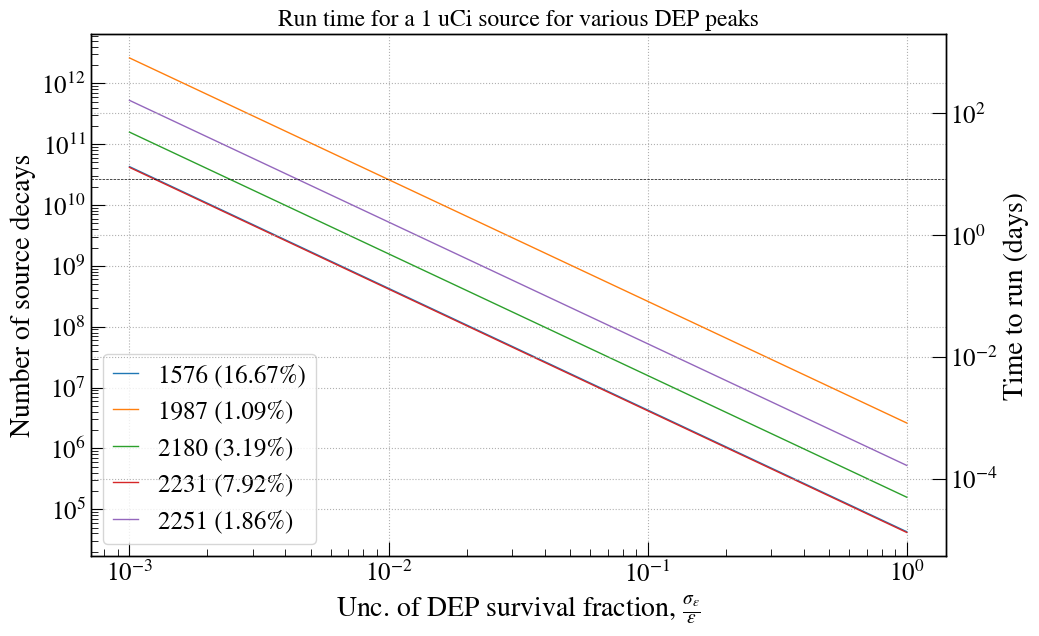

In [397]:
epsilon = 0.9
source_strength_uCi = 1 # uCi
source_strength_Bq = source_strength_uCi*37e3
rel_uncs = []
peaks_to_use = [0,2,3,4,5]
df_peak_counts_to_use = df_peak_counts.loc[peaks_to_use]
fig = plt.figure(figsize=(10,6))
ax = plt.gca()

for i in peaks_to_use:
    N = df_peak_counts_to_use['N_sideband'][i]
    B = df_peak_counts_to_use['B_sideband'][i]
    tau = df_peak_counts_to_use['tau'][i]
    print(df_peak_counts_to_use['Peak'][i],N,B,tau)
    N_c = N*epsilon
    B_c = B*epsilon

    rel_unc_sqrd = (N+tau**2*B)/(N-tau*B)**2 + (N_c+tau**2*B_c)/(N_c-tau*B_c)**2 - 2*(N_c+tau**2*B_c)/(N_c-tau*B_c)/(N-tau*B)
    rel_unc = np.sqrt(rel_unc_sqrd)
    rel_uncs.append(rel_unc)

    
    x = np.linspace(0.001, 1, 999)
    y = primaries*rel_unc**2/x**2
    ax.plot(x, y, lw=1, label=df_peak_counts_to_use['Peak'][i]+' ('+str(df_peak_counts_to_use['Intensity'][i])+'%)')
    ax.set_xlabel('Unc. of DEP survival fraction, '+r'$\frac{\sigma_{\epsilon}}{\epsilon}$')
    ax.set_ylabel('Number of source decays')
    ax.set_title('Run time for a '+str(source_strength_uCi)+' uCi source for various DEP peaks')
    ax.set_xscale('log')
    ax.set_yscale('log')
    

# get ylim

ylim = ax.get_ylim()
time_axis_ylim = [ylim[0]/source_strength_Bq/3600/24, ylim[1]/source_strength_Bq/3600/24]
# get twinx
ax2 = ax.twinx()
ax2.set_ylim(time_axis_ylim)
ax2.set_ylabel('Time to run (days)')
ax2.set_yscale('log')
ax2.yaxis.set_minor_formatter(FormatStrFormatter("%.1f"))
ax2.axhline(8.5, color='k', ls='--', lw=0.5)


ax.legend(loc='lower left')
df_peak_counts_to_use['rel_unc'] = rel_uncs
df_peak_counts_to_use['S_sideband'] = df_peak_counts_to_use['S_sideband'].round()
df_peak_counts_to_use['S_curve_fit'] = df_peak_counts_to_use['S_curve_fit'].round()
df_peak_counts_to_use['FWHM'] = df_peak_counts_to_use['FWHM'].round(2)

df_peak_counts_to_use[['Peak', 'Intensity', 'N_sideband', 'B_sideband', 'S_sideband', 'S_curve_fit', 'FWHM']]
    

11610.254379195092 4092.825719055969 2.3333333333333335
7350.140189480811 3569.8552681111514 2.0
6343.305683329483 2464.0132997334754 2.25
9360.084783141723 5144.97398534851 1.5
5090.038810382793 2697.72056950288 1.75


,Peak,N_sideband,B_sideband,S_sideband,N_sideband_cold,B_sideband_cold,S_sideband_cold
0,1576,37408,13187,6638.0,11610.0,4093.0,2060.0
2,1987,23682,11502,678.0,7350.0,3570.0,210.0
3,2180,20438,7939,2575.0,6343.0,2464.0,799.0
4,2231,30158,16577,5292.0,9360.0,5145.0,1643.0
5,2251,16400,8692,1189.0,5090.0,2698.0,369.0


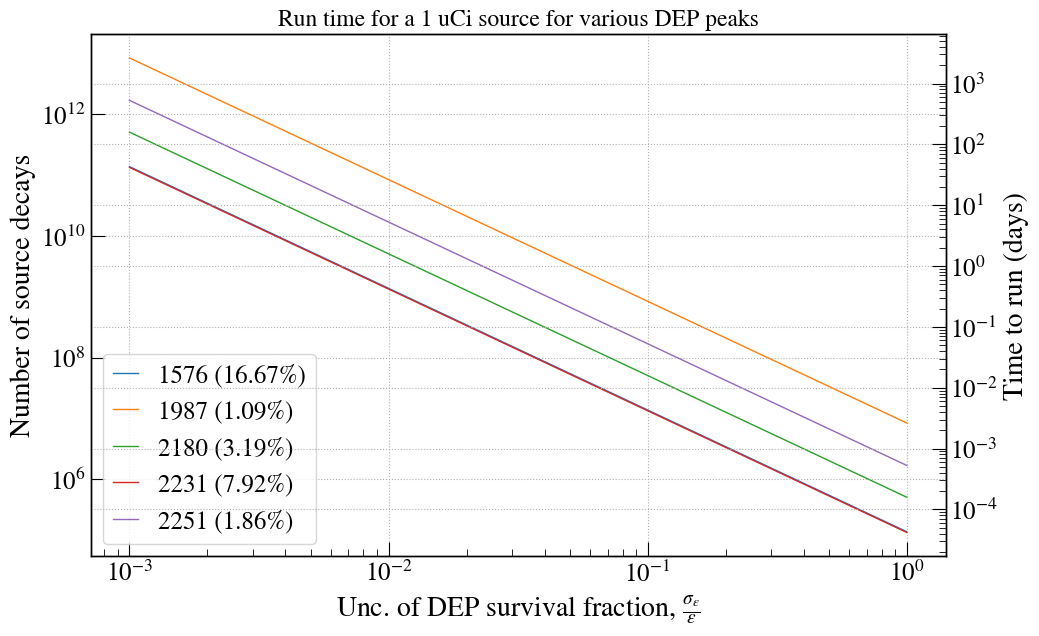

In [398]:
# source_strength_uCi = 1 # uCi
# source_strength_Bq = source_strength_uCi*37e3
peaks_to_use = [0,2,3,4,5]
df_peak_counts_to_use = df_peak_counts.loc[peaks_to_use]


hot_det_count = count_map['string 7'][4]
cold_det_count = count_map['string 8'][5]
cold_to_hot_ratio = cold_det_count/hot_det_count

df_peak_counts_to_use['N_sideband_cold'] = df_peak_counts_to_use['N_sideband']*cold_to_hot_ratio
df_peak_counts_to_use['B_sideband_cold'] = df_peak_counts_to_use['B_sideband']*cold_to_hot_ratio
df_peak_counts_to_use['S_sideband_cold'] = df_peak_counts_to_use['S_sideband']*cold_to_hot_ratio

epsilon = 0.9
rel_uncs = []

fig = plt.figure(figsize=(10,6))
ax = plt.gca()
for i in peaks_to_use:
    N = df_peak_counts_to_use['N_sideband_cold'][i]
    B = df_peak_counts_to_use['B_sideband_cold'][i]
    tau = df_peak_counts_to_use['tau'][i]
    print(N,B,tau)
    N_c = N*epsilon
    B_c = B*epsilon

    rel_unc_sqrd = (N+tau**2*B)/(N-tau*B)**2 + (N_c+tau**2*B_c)/(N_c-tau*B_c)**2 - 2*(N_c+tau**2*B_c)/(N_c-tau*B_c)/(N-tau*B)
    rel_unc = np.sqrt(rel_unc_sqrd)
    rel_uncs.append(rel_unc)

    
    x = np.linspace(0.001, 1, 999)
    y = primaries*rel_unc**2/x**2
    ax.plot(x, y, lw=1, label=df_peak_counts_to_use['Peak'][i]+' ('+str(df_peak_counts_to_use['Intensity'][i])+'%)')
    ax.set_xlabel('Unc. of DEP survival fraction, '+r'$\frac{\sigma_{\epsilon}}{\epsilon}$')
    ax.set_ylabel('Number of source decays')
    ax.set_title('Run time for a '+str(source_strength_uCi)+' uCi source for various DEP peaks')
    ax.set_xscale('log')
    ax.set_yscale('log')

# get ylim
ylim = ax.get_ylim()
time_axis_ylim = [ylim[0]/source_strength_Bq/3600/24, ylim[1]/source_strength_Bq/3600/24]
# get twinx
ax2 = ax.twinx()
ax2.set_ylim(time_axis_ylim)
ax2.set_ylabel('Time to run (days)')
ax2.set_yscale('log')

ax.legend(loc='lower left')
df_peak_counts_to_use['rel_unc_cold'] = rel_uncs
df_peak_counts_to_use = df_peak_counts_to_use.round()
df_peak_counts_to_use[['Peak', 'N_sideband','B_sideband', 'S_sideband', 'N_sideband_cold','B_sideband_cold', 'S_sideband_cold']]

(0.0, 6.0)

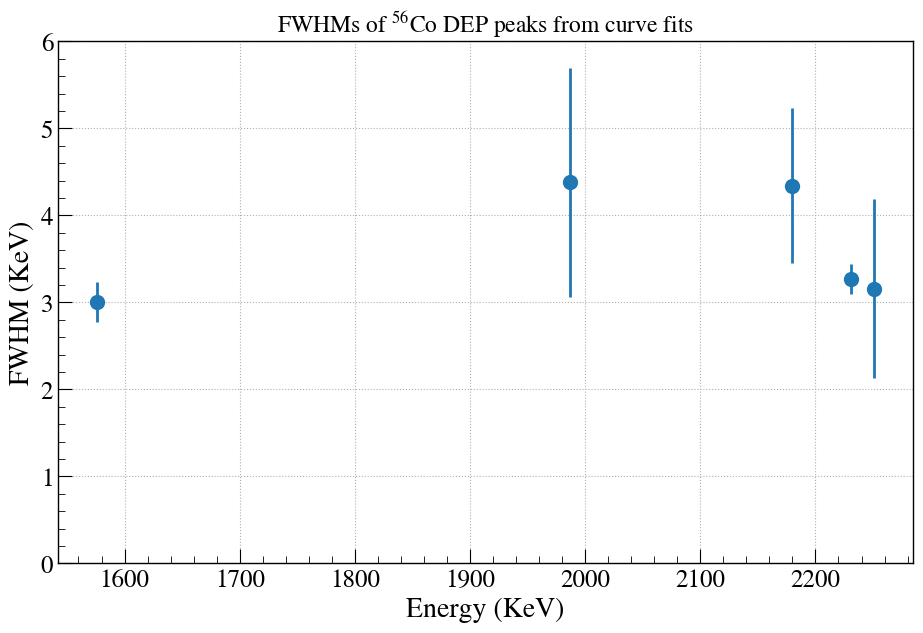

In [411]:
fig = plt.figure(figsize=(10,6))
ax = plt.gca()
peak_vals = []
fwhms = []
fwhm_errs = []
for i in peaks_to_use:
    if str(df_peak_counts['FWHM'][i])=='nan':
        continue
    peak_val = int(df_peak_counts['Peak'][i])
    peak_vals.append(peak_val)
    fwhm = df_peak_counts['FWHM'][i]
    fwhms.append(fwhm)
    fwhm_err = df_peak_counts['FWHM_err'][i]
    fwhm_errs.append(fwhm_err)
ax.errorbar(peak_vals, fwhms, yerr=fwhm_errs, marker='o', lw=2, ls='none',label=df_peak_counts['Peak'][i]+' ('+str(df_peak_counts['Intensity'][i])+'%)')
ax.set_xlabel('Energy (KeV)')
ax.set_ylabel('FWHM (KeV)')
ax.set_title(r'FWHMs of $^{56}$Co DEP peaks from curve fits')
ax.set_ylim(0,6)

# E_cals = [int(df_peak_counts['Peak'][i]) for i in range(len(df_peak_counts))]
# E_cals = np.array(E_cals)
# popt, pcov = curve_fit(fwhm_func, E_cals, fwhms)
# print(popt)
# x = np.linspace(E_cals[0], E_cals[-1], 1000)
# y = fwhm_func(x, *popt)
# ax.plot(x, y, lw=1, label='Fit', p0=[2,0.1,0.01])
    

In [401]:
df_peak_counts['tau'] = df_peak_counts['tau'].round(1)
df_peak_counts['FWHM'] = df_peak_counts['FWHM'].round(2)
df_peak_counts['FWHM_err'] = df_peak_counts['FWHM_err'].round(2)
df_peak_counts['S_sideband'] = df_peak_counts['S_sideband'].round(0)
df_peak_counts['S_curve_fit'] = df_peak_counts['S_curve_fit'].round(0)
df_peak_counts['S_curve_fit_err'] = df_peak_counts['S_curve_fit_err'].round(0)
df_peak_counts[['Peak', 'Intensity', 'N_sideband','B_sideband', 'S_sideband', 'S_curve_fit', 'S_curve_fit_err','FWHM', 'FWHM_err',]]
df_peak_counts[['Peak','FWHM', 'FWHM_err']]

,Peak,FWHM,FWHM_err
0,1576,3.01,0.23
1,1635,NaN,NaN
2,1987,4.38,1.32
3,2180,4.34,0.89
4,2231,3.27,0.17
5,2251,3.16,1.03
6,2429,4.39,2.21


In [410]:
N_p = 121000000 #primaries
event_rate_map = count_map/N_p*source_strength_Bq
event_rate_map = event_rate_map.round(1)
event_rate_map = lu.attach_det_type_map(event_rate_map)
event_rate_map

,string 1,string 2,string 3,string 4,string 5,string 7,string 8,string 9,string 10,string 11
1,V:41.0,B:13.9,B:16.1,B:17.5,V:53.2,V:106.3,B:31.0,B:24.6,B:27.0,B:15.7
2,V:76.1,C:54.5,B:22.7,B:31.6,V:244.8,V:387.3,B:44.4,B:36.8,B:41.1,B:28.6
3,V:154.7,C:97.0,P:43.4,B:43.5,V:882.0,V:2386.9,C:396.9,B:69.8,B:61.9,B:33.2
4,V:185.7,C:179.9,P:64.9,B:60.5,V:1185.1,V:14215.9,V:1411.1,B:134.7,B:99.2,P:92.3
5,V:174.5,C:216.0,P:110.6,B:99.9,V:1114.4,V:3598.3,V:4412.2,P:359.1,B:144.1,P:141.4
6,V:118.4,C:166.9,P:126.7,B:124.3,.,V:569.4,V:3993.5,P:720.3,B:232.3,P:195.4
7,V:79.0,V:76.9,P:131.4,B:165.2,.,V:112.6,V:815.0,P:1057.7,B:293.2,P:170.7
8,V:35.9,V:37.8,P:93.9,V:251.0,.,.,V:249.3,P:756.4,B:282.2,P:135.6
9,V:17.4,V:19.6,P:70.0,V:228.1,.,.,V:93.7,P:394.5,V:669.8,P:89.2
10,.,.,.,V:137.0,.,.,V:26.1,P:191.9,V:392.8,P:60.5


In [415]:
all_peaks[0]

{'name': '846',
 'energy': 846.8,
 'intensity': 100,
 'range': [835, 855],
 'curve_fit_guess': [1000, 846.8, 1, 0, 0, 0]}

846 [835, 855]
peak width: 7.5
peak_count: 2972005
peak_count: 2972005 sideband_count: 108544 sidband_width: 8
tau: 0.9375
1037 [1025, 1045]
peak width: 8
peak_count: 425304
peak_count: 425304 sideband_count: 84115 sidband_width: 7
tau: 1.1428571428571428
1238 [1228, 1248]
peak width: 8.5
peak_count: 1545498
peak_count: 1545498 sideband_count: 42273 sidband_width: 7
tau: 1.2142857142857142
1771 [1760, 1780]
peak width: 9.5
peak_count: 341272
peak_count: 341272 sideband_count: 27519 sidband_width: 8
tau: 1.1875
2015 [2005, 2025]
peak width: 10
peak_count: 79499
peak_count: 79499 sideband_count: 14153 sidband_width: 6
tau: 1.6666666666666667
2034 [2025, 2045]
peak width: 10
peak_count: 164286
peak_count: 164286 sideband_count: 15091 sidband_width: 7
tau: 1.4285714285714286
2113 [2106, 2120]
peak width: 9.5
peak_count: 25158
peak_count: 25158 sideband_count: 6088 sidband_width: 3
tau: 3.1666666666666665
2598 [2588, 2608]
peak width: 11
peak_count: 339095
peak_count: 339095 sideband_count:

,Peak,Intensity,N_sideband,B_sideband,tau,S_sideband,S_curve_fit,S_curve_fit_err,FWHM,FWHM_err
0,846,100.000,2972005,108544,0.937500,2.870245e+06,2.871233e+06,1412.278056,2.626264,0.001011
1,1037,14.300,425304,84115,1.142857,3.291726e+05,3.365146e+05,634.852393,2.759421,0.004069
2,1238,66.500,1545498,42273,1.214286,1.494166e+06,1.493414e+06,1053.584568,2.892812,0.001605
3,1771,15.400,341272,27519,1.187500,3.085932e+05,3.091712e+05,983.748753,3.226917,0.008075
4,2015,3.015,79499,14153,1.666667,5.591067e+04,5.581747e+04,528.486246,3.314711,0.024724
5,2034,7.770,164286,15091,1.428571,1.427274e+05,1.426213e+05,405.277189,3.358321,0.007519
6,2113,0.377,25158,6088,3.166667,5.879333e+03,6.578385e+03,321.243233,3.303249,0.123463
7,2598,16.670,339095,7034,1.833333,3.261993e+05,3.252881e+05,924.328180,3.676571,0.008215
8,2657,0.019,5785,8362,0.625000,5.587500e+02,3.457844e+02,118.659162,1.844212,0.495790
9,3009,1.040,40298,5394,2.300000,2.789180e+04,2.695613e+04,265.730323,3.893649,0.030115


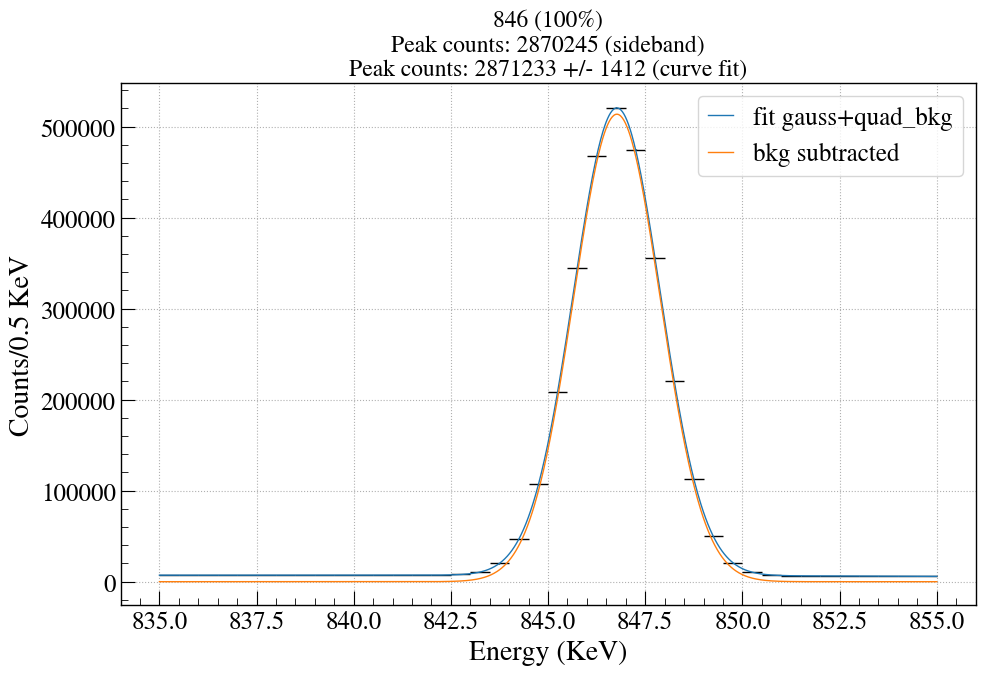

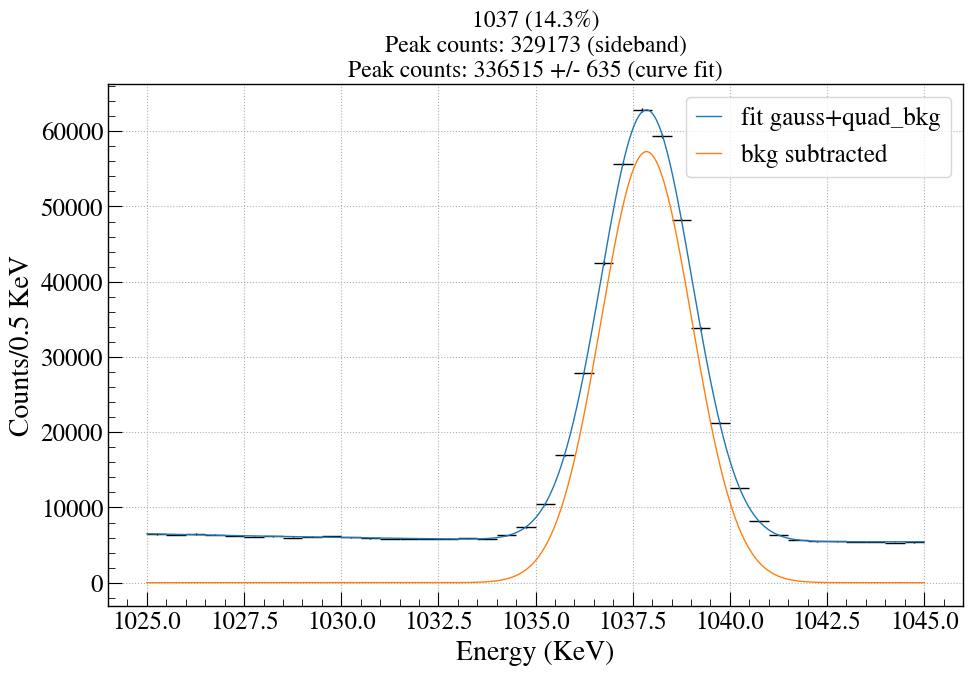

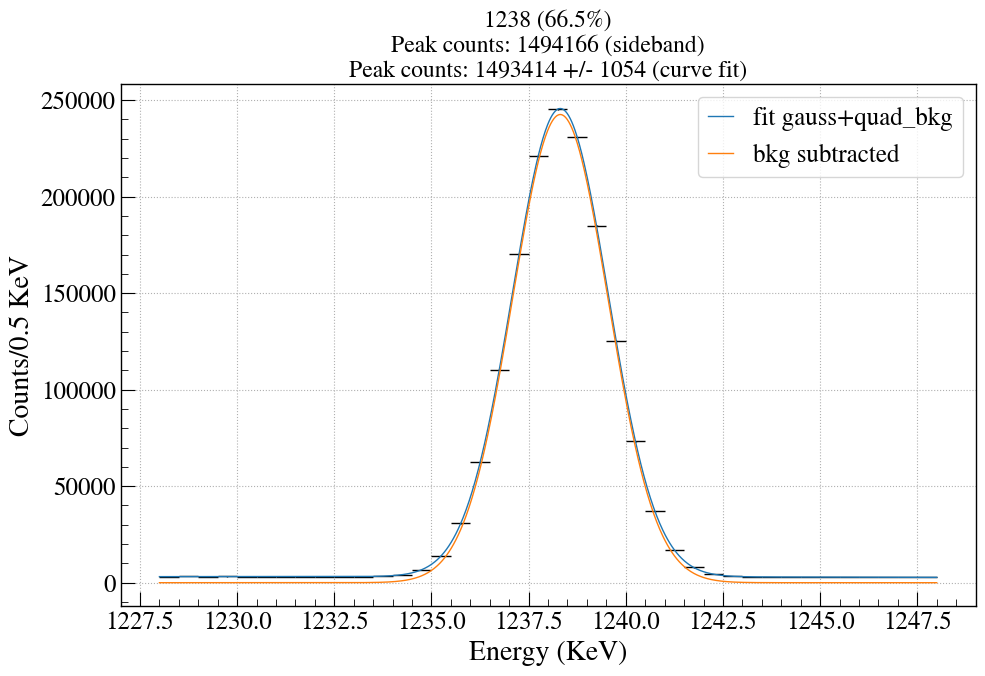

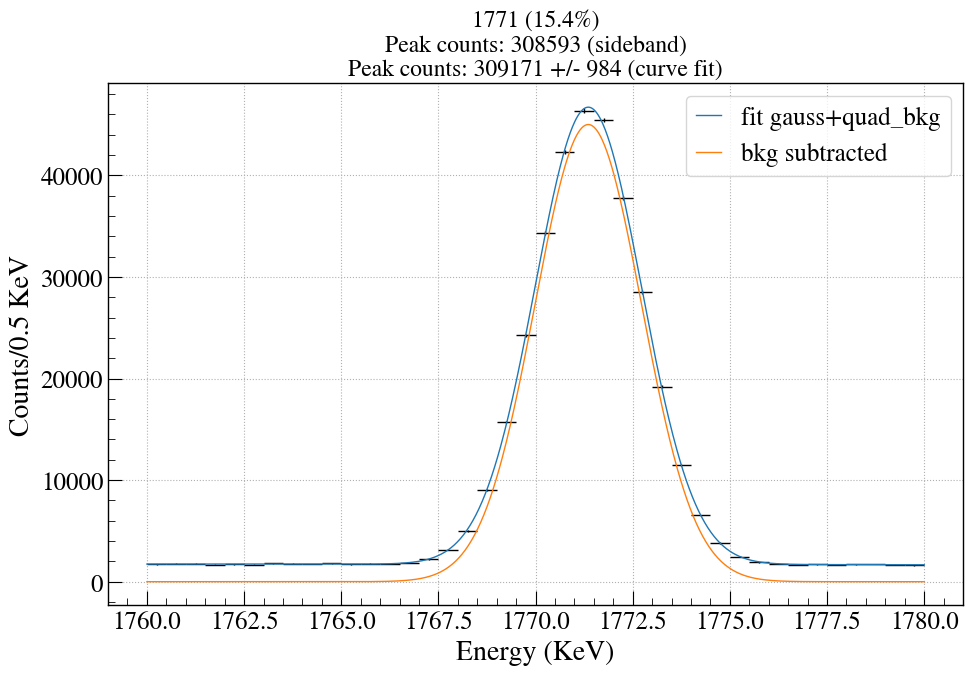

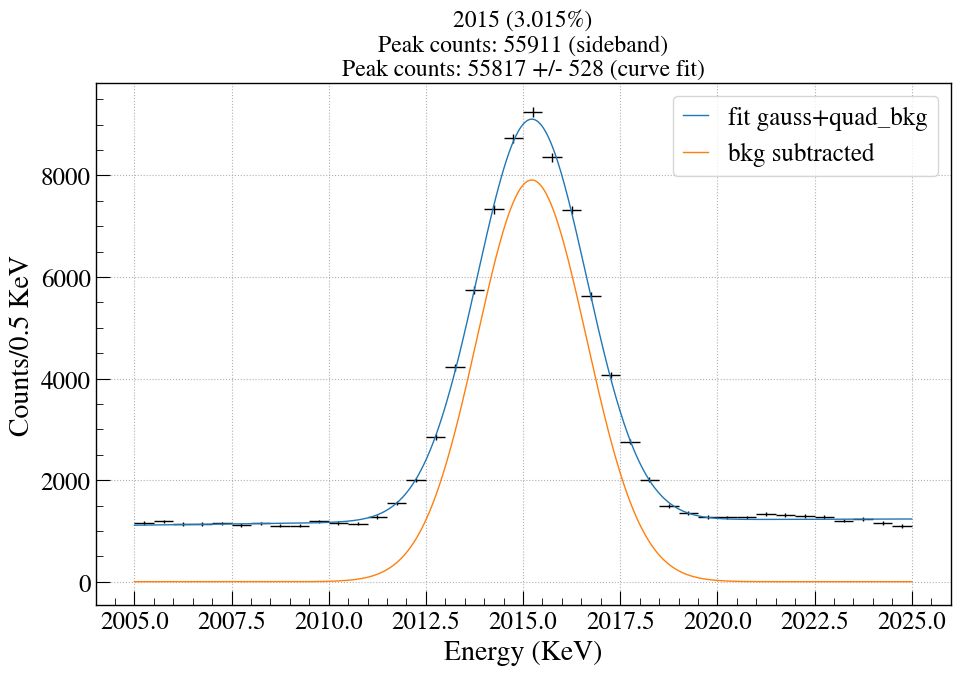

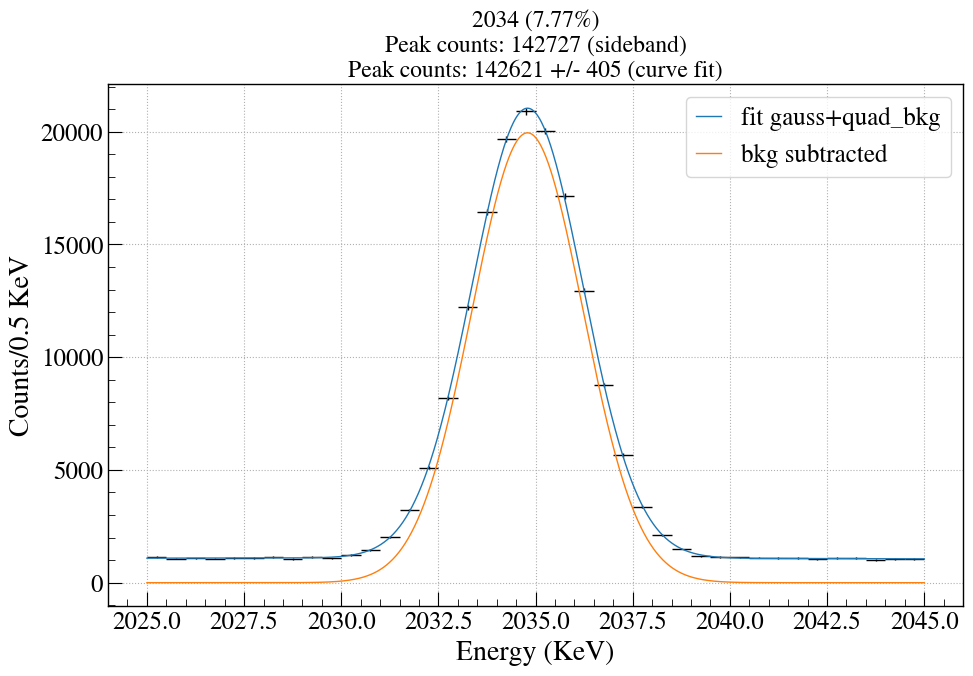

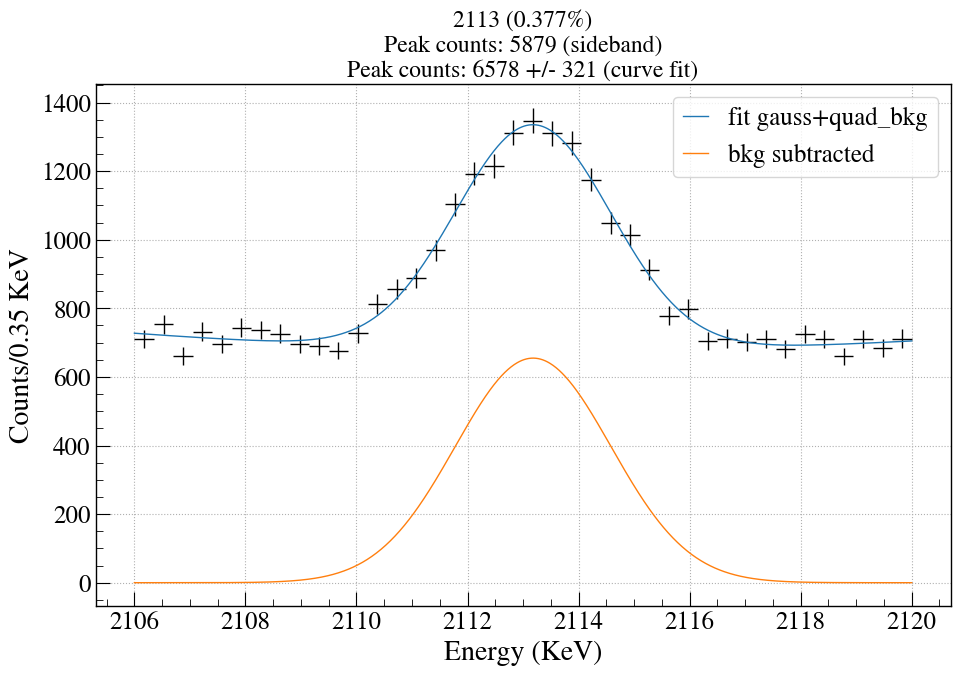

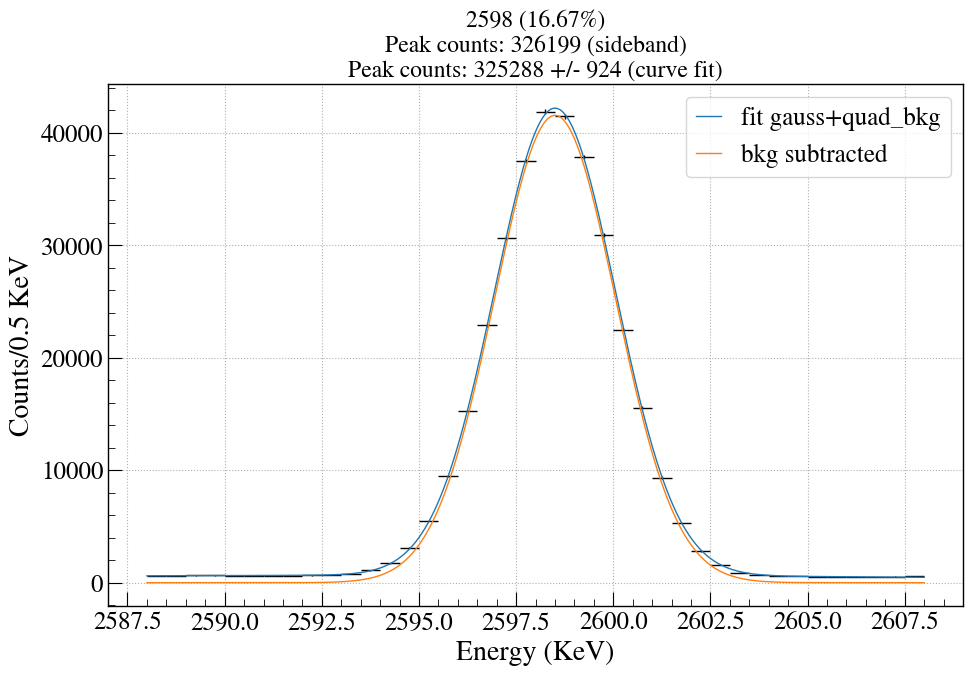

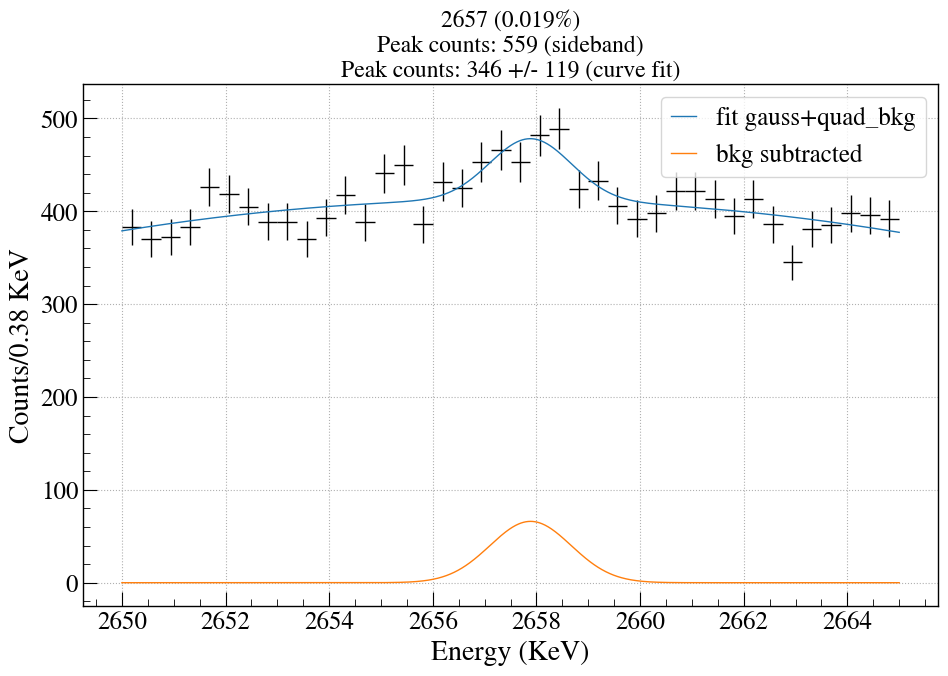

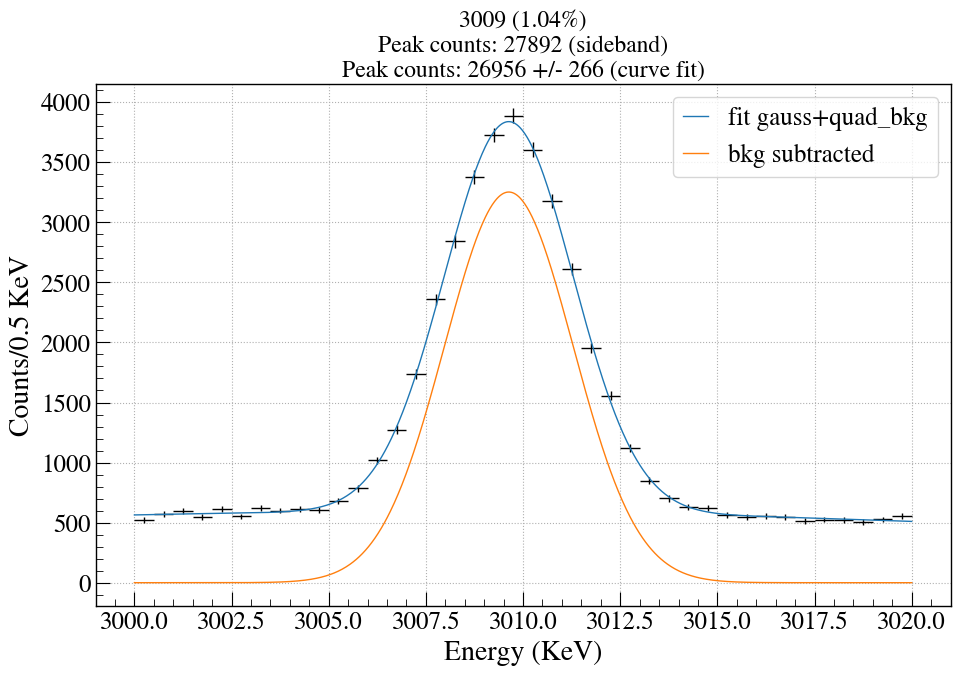

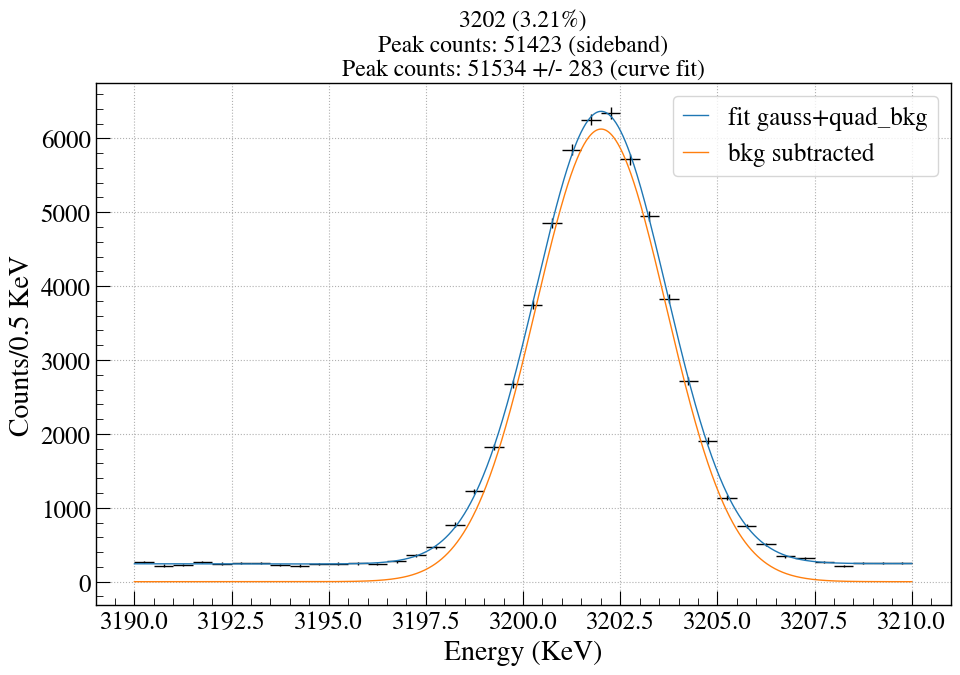

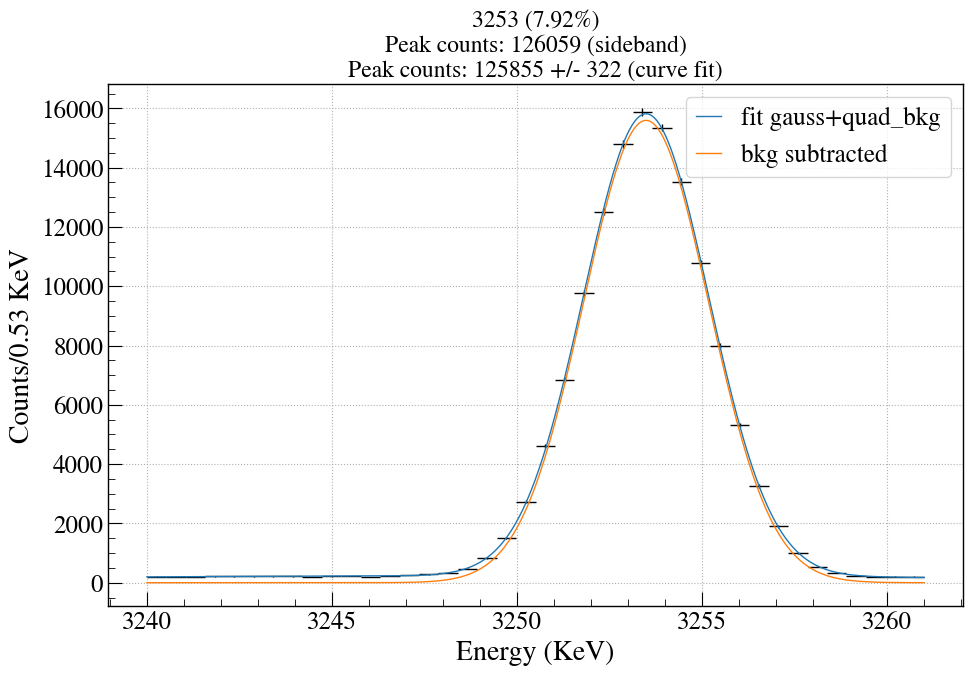

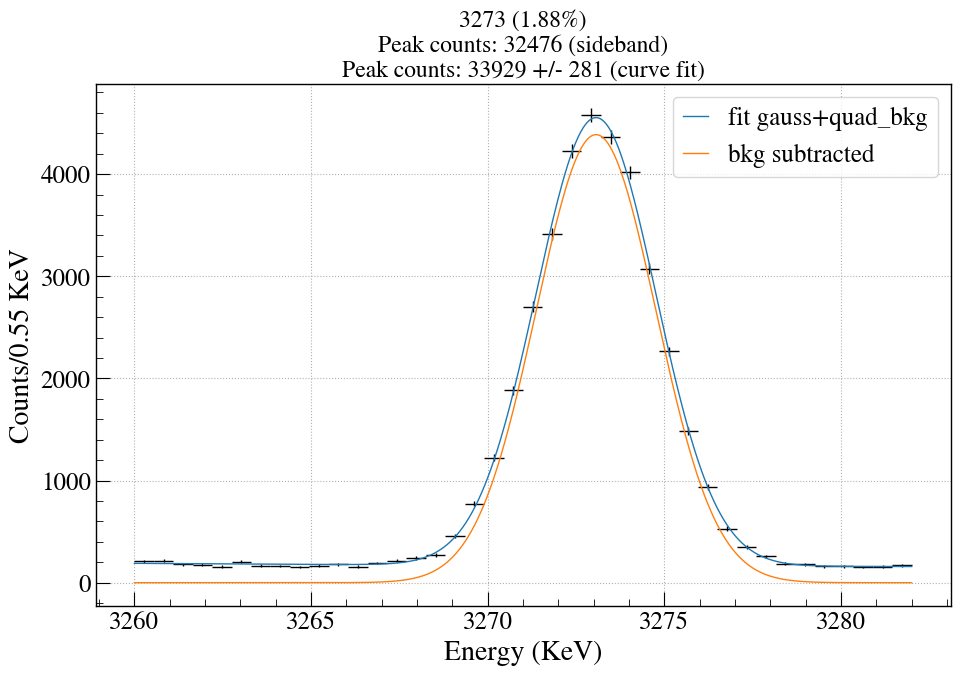

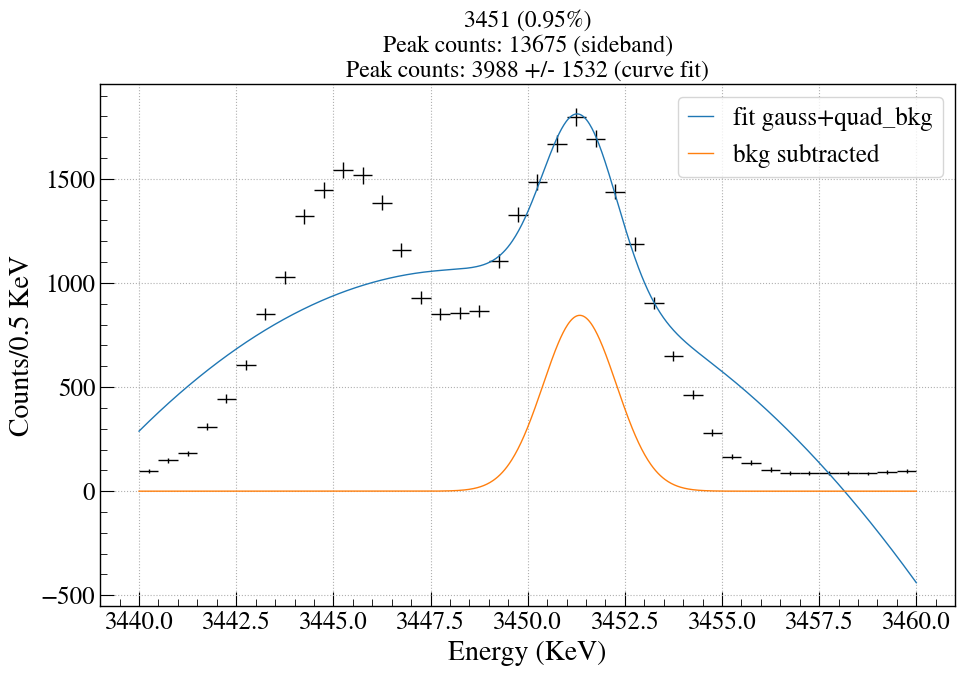

In [468]:
df_all_peak_counts = pd.DataFrame()
for i in range(len(all_peaks)):
    peaks_to_consider = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]
    if i not in peaks_to_consider:
        continue
    peak = all_peaks[i]
    E_dets = df[df['mage_id'].isin(dets)]['energy']
    print(peak['name'], peak['range'])
    E_peak = E_dets[(E_dets>peak['range'][0]) & (E_dets<peak['range'][1])]
    n_bins = 40
    h,b,v = pgh.get_hist(E_peak, range=peak['range'], dx=(peak['range'][1]-peak['range'][0])/n_bins)
    binsize = b[1]-b[0]
    
    fig = plt.figure(figsize=(10,6))
    ax = plt.gca()

    pgh.plot_hist(h, b,v, color='k', lw=1)
    ax.set_xlabel('Energy (KeV)')
    ax.set_ylabel('Counts/'+str(round(binsize,2))+' KeV')

    # sideband
    peak_width = peak['sideband_peak_range'][1]-peak['sideband_peak_range'][0]
    print('peak width:', peak_width)
    peak_count = len(E_peak[(E_peak>peak['sideband_peak_range'][0]) & (E_peak<peak['sideband_peak_range'][1])])
    print('peak_count:', peak_count)
    sideband_width = 0
    sideband_count = 0
    for sideband in peak['sidebands']:
        sideband_width += sideband[1]-sideband[0]
        sideband_count += len(E_peak[(E_dets>sideband[0]) & (E_peak<sideband[1])])
    print('peak_count:', peak_count, 'sideband_count:', sideband_count, 'sidband_width:', sideband_width)
    tau = peak_width/sideband_width
    print('tau:', tau)
    S = peak_count - tau*sideband_count
    # peak_count = round(peak_count)
    # sideband_count = round(sideband_count)
    # S = round(S)
    d = pd.DataFrame({'Peak':peak['name'],'Intensity':peak['intensity'], 'N_sideband': [round(peak_count)], 'B_sideband': [sideband_count],'tau': [tau], 'S_sideband': [S]})
    title_str_sideband = 'Peak counts: '+str(round(S))+' (sideband)'
    ax.set_title(peak['name']+' ('+str(peak['intensity'])+'%)\n'+title_str_sideband+'\n')
    if i in [1]:
        d['S_curve_fit'] = np.nan
        d['S_curve_fit_err'] = np.nan
        d['FWHM']= np.nan
        d['FWHM_err']= np.nan

    # curve fit
    try:
        b_mids = (b[1:]+b[:-1])/2
        popt, pcov = curve_fit(gauss_with_quad_bkg, b_mids, h, p0=peak['curve_fit_guess'])
        perr = np.sqrt(np.diag(pcov))
        
        x = np.linspace(peak['range'][0], peak['range'][1], 1000)
        total_fit_y = gauss_with_quad_bkg(x, *popt)
        ax.plot(x, total_fit_y, lw=1, label='fit gauss+quad_bkg')

        bkg = quad_bkg(x, *popt[3:])
        # bkg = quad_bkg(x, popt_fixed_mu[2:])
        bkg_subtracted_y = total_fit_y - bkg
        ax.plot(x, bkg_subtracted_y, lw=1, label='bkg subtracted')
        ax.legend()
        A = popt[0]
        sigma = popt[2]
        A_err = perr[0]
        sigma_err = perr[2]
        area = A*sigma*np.sqrt(2*np.pi)/binsize
        area = abs(area)
        area_err = area*np.sqrt((A_err/A)**2 + (sigma_err/sigma)**2)
        area_err = abs(area_err)
        title_str_curve_fit = 'Peak counts: '+str(round(area))+' +/- '+str(round(area_err))+' (curve fit)'
        d['S_curve_fit'] = abs(area)
        d['S_curve_fit_err'] = abs(area_err)
        d['FWHM']= abs(sigma*2.355)
        d['FWHM_err']= abs(perr[2]*2.355)
        ax.set_title(peak['name']+' ('+str(peak['intensity'])+'%)\n'+title_str_sideband+'\n'+title_str_curve_fit)
    except:
        title_str_curve_fit = ''
        d['S_curve_fit'] = np.nan
        d['S_curve_fit_err'] = np.nan
        d['FWHM']= np.nan
        d['FWHM_err']= np.nan
        print(peak['name'],'fit failed')

    df_all_peak_counts = pd.concat([df_all_peak_counts, d], ignore_index=True)
    
    # ax.set_title(peak['name']+' ('+str(peak['intensity'])+'%)\n'+title_str_sideband+'\n'+title_str_curve_fit)
    
df_all_peak_counts

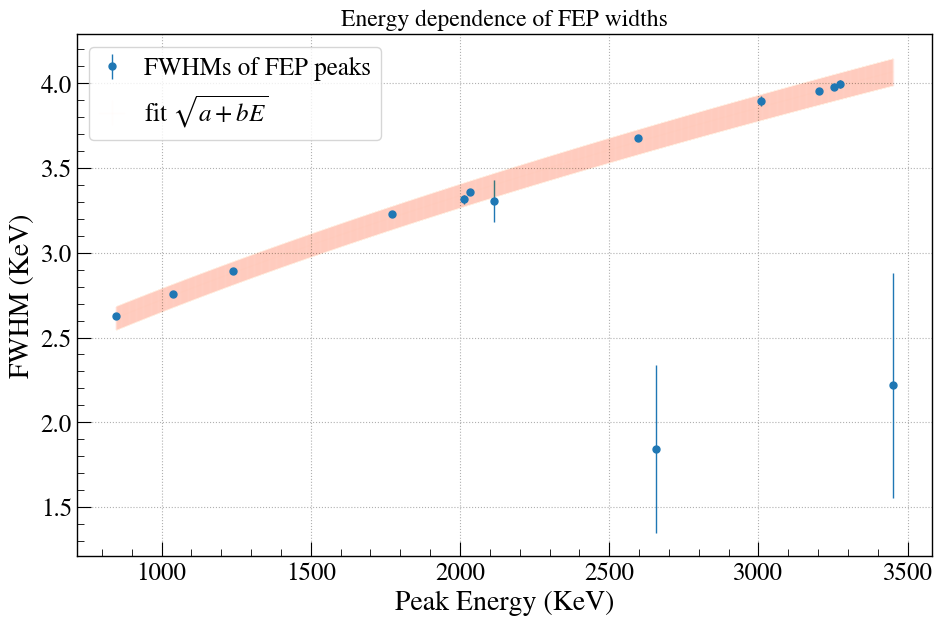

In [465]:
fig = plt.figure(figsize=(10,6))
ax = plt.gca()
ax.errorbar(df_all_peak_counts['Peak'].astype(float), df_all_peak_counts['FWHM'], yerr=df_all_peak_counts['FWHM_err'], fmt='.', lw=1, label='FWHMs of FEP peaks')
ax.set_xlabel('Peak Energy (KeV)')
ax.set_ylabel('FWHM (KeV)')
ax.set_title('Energy dependence of FEP widths')

def fwhm_fit(x, a, b, c, d):
    return np.sqrt(a**2 + b**2*x**2 + c**4*x**4 + d**6*x**6)
def fwhm_fit(x, a,b):
    return np.sqrt(a + b*x)
D = df_all_peak_counts.copy()
D = D.drop([8,13])
popt, pcov = curve_fit(fwhm_fit, D['Peak'].astype(float), D['FWHM'], p0=[3.5,0.004])
perr = np.sqrt(np.diag(pcov))
a = popt[0]
b = popt[1]
a_err = perr[0]
b_err = perr[1]
x = np.linspace(846, 3451, 10000)
y = fwhm_fit(x, *popt)
y_err = np.sqrt((a_err**2/(a+b*x)) + x*x*b_err**2/(a+b*x))
ax.errorbar(x, y,yerr=y_err, lw=1, alpha=0.01, label=r'fit $\sqrt{a+bE}$')
ax.legend()

In [469]:
df_all_peak_counts['Intensity']=df_all_peak_counts['Intensity'].round(2)
df_all_peak_counts['tau']=df_all_peak_counts['tau'].round(1)
df_all_peak_counts['S_sideband']=df_all_peak_counts['S_sideband'].round(1)
df_all_peak_counts['S_curve_fit']=df_all_peak_counts['S_curve_fit'].round(1)
df_all_peak_counts['S_curve_fit_err']=df_all_peak_counts['S_curve_fit_err'].round(1)
df_all_peak_counts['FWHM']=df_all_peak_counts['FWHM'].round(3)
df_all_peak_counts['FWHM_err']=df_all_peak_counts['FWHM_err'].round(3)
df_all_peak_counts


,Peak,Intensity,N_sideband,B_sideband,tau,S_sideband,S_curve_fit,S_curve_fit_err,FWHM,FWHM_err
0,846,100.00,2972005,108544,0.9,2870245.0,2871232.7,1412.3,2.626,0.001
1,1037,14.30,425304,84115,1.1,329172.6,336514.6,634.9,2.759,0.004
2,1238,66.50,1545498,42273,1.2,1494166.5,1493414.1,1053.6,2.893,0.002
3,1771,15.40,341272,27519,1.2,308593.2,309171.2,983.7,3.227,0.008
4,2015,3.02,79499,14153,1.7,55910.7,55817.5,528.5,3.315,0.025
5,2034,7.77,164286,15091,1.4,142727.4,142621.3,405.3,3.358,0.008
6,2113,0.38,25158,6088,3.2,5879.3,6578.4,321.2,3.303,0.123
7,2598,16.67,339095,7034,1.8,326199.3,325288.1,924.3,3.677,0.008
8,2657,0.02,5785,8362,0.6,558.8,345.8,118.7,1.844,0.496
9,3009,1.04,40298,5394,2.3,27891.8,26956.1,265.7,3.894,0.030


In [450]:

D

,Peak,Intensity,N_sideband,B_sideband,tau,S_sideband,S_curve_fit,S_curve_fit_err,FWHM,FWHM_err
0,846,100.000,2972005,108544,0.937500,2.870245e+06,2.871233e+06,1412.278056,2.626264,0.001011
1,1037,14.300,425304,84115,1.142857,3.291726e+05,3.365146e+05,634.852393,2.759421,0.004069
2,1238,66.500,1545498,42273,1.214286,1.494166e+06,1.493414e+06,1053.584568,2.892812,0.001605
3,1771,15.400,341272,27519,1.187500,3.085932e+05,3.091712e+05,983.748753,3.226917,0.008075
4,2015,3.015,79499,14153,1.666667,5.591067e+04,5.581747e+04,528.486246,3.314711,0.024724
5,2034,7.770,164286,15091,1.428571,1.427274e+05,1.426213e+05,405.277189,3.358321,0.007519
6,2113,0.377,25158,6088,3.166667,5.879333e+03,6.578385e+03,321.243233,3.303249,0.123463
7,2598,16.670,339095,7034,1.833333,3.261993e+05,3.252881e+05,924.328180,3.676571,0.008215
9,3009,1.040,40298,5394,2.300000,2.789180e+04,2.695613e+04,265.730323,3.893649,0.030115
10,3202,3.210,57312,1963,3.000000,5.142300e+04,5.153401e+04,283.480365,3.951635,0.017029
